# Run H2O on CoLab

## Installation and initialize

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
! apt-get install default-jre
!java -version
! pip install h2o

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
default-jre is already the newest version (2:1.11-72build2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
openjdk version "11.0.22" 2024-01-16
OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1)
OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)


In [ ]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,20 mins 49 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_unknownUser_85ywey
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.149 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


## 100_H2O AutoML for IRIS ratio prediction

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
#Load data from google colab
data = pd.read_csv('/content/gdrive/MyDrive/DATA/IRIS_pr_s100.csv')

In [ ]:
#Load data on deivce
data = pd.read_csv('./csv/IRIS_pr_s100.csv')

In [ ]:
#data=data.drop(['Unnamed: 83'],axis=1)
y=data['Insolvent?']
x=data.drop(['Insolvent?','R2_NextYear'],axis=1)
#x=data.drop(['Insolvent?','R2 after 3 years'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
train= pd.concat([x_train, y_train], axis=1, sort=False)
test=pd.concat([x_test,y_test],axis=1,sort=False)
train_h2o=h2o.H2OFrame(train)
test_h2o=h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
train_h2o

Year,State,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R1_normal,R2_normal,R3_normal,R4_normal,R5_normal,R6_normal,R7_normal,R8_normal,R9_normal,R10_normal,R11_normal,R12_normal,R13_normal,Insolvent?
2011,IA,454,67,23,0,79,1.2,12,10,59,3,-29,-15,-11,1,1,1,1,1,0,1,1,1,1,1,1,1,Solvent
2011,NY,433,60,1,1,101,4.2,6,6,78,17,-2,11,-6,1,1,1,1,0,1,1,1,1,1,1,1,1,Solvent
2010,WI,694,131,31,0,97,4.5,11,11,104,14,3,-1,-33,1,1,1,1,1,1,1,1,1,1,1,1,1,Insolvent
2012,VT,26,24,43,0,24,2.6,8,8,27,0,-10,-22,1,1,1,0,1,1,0,1,1,1,1,1,1,1,Solvent
2008,DE,231,89,5,0,72,4.8,11,11,71,5,-3,-4,7,1,1,1,1,1,1,1,1,1,1,1,1,1,Solvent
2015,CT,130,120,6,0,76,5.5,0,0,78,7,-4,-8,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,Solvent
2015,WI,63,53,-4,0,77,3.6,0,0,111,0,-17,-29,-18,1,1,1,1,1,1,1,1,0,1,1,1,1,Solvent
2012,CO,4,3,-10,0,84,2.9,1,1,39,1,-7,-11,0,1,1,1,1,1,0,1,1,1,1,1,1,1,Solvent
2009,IL,334,94,0,0,96,4.6,-8,-8,61,0,-3,-8,-18,1,1,1,1,1,1,1,1,1,1,1,1,1,Solvent
2015,VT,107,32,-64,0,85,1.7,-21,-20,70,1,-24,-56,-77,1,1,0,1,1,0,0,0,1,1,1,1,1,Solvent


In [ ]:
x_list=train_h2o.columns
y_list='Insolvent?'
# For binary classification, response should be a factor
train_h2o[y_list] = train_h2o[y_list].asfactor()
test_h2o[y_list] = test_h2o[y_list].asfactor()

In [ ]:
import h2o
from h2o.automl import H2OAutoML
# Run AutoML for 4 base models
aml = H2OAutoML(max_models=4, seed=1)
aml.train(x=x_list, y=y_list, training_frame=train_h2o)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/4
# GBM base models (used / total),1/1
# XGBoost base models (used / total),2/2
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None
Custom metalearner hyperparameters,None


In [ ]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_3_20240329_82101,0.962111,0.231594,0.979366,0.104758,0.261458,0.0683605
StackedEnsemble_BestOfFamily_1_AutoML_3_20240329_82101,0.961742,0.232878,0.979406,0.112298,0.26207,0.0686805
GBM_1_AutoML_3_20240329_82101,0.959882,0.237087,0.978181,0.112942,0.263958,0.0696738
XGBoost_1_AutoML_3_20240329_82101,0.958375,0.245187,0.977573,0.107971,0.268464,0.0720729
XGBoost_2_AutoML_3_20240329_82101,0.957241,0.249459,0.975697,0.116331,0.270579,0.0732129
GLM_1_AutoML_3_20240329_82101,0.946234,0.301996,0.961688,0.114197,0.280719,0.0788034


In [ ]:
perf = aml.leader.model_performance(test_h2o)
perf

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.06673302505992511
RMSE: 0.25832736026198444
LogLoss: 0.229592053419209
AUC: 0.9622175023552618
AUCPR: 0.979359657473852
Gini: 0.9244350047105236
Null degrees of freedom: 3841
Residual degrees of freedom: 3837
Null deviance: 4880.284579549953
Residual deviance: 1764.1853384732021
AIC: 1774.1853384732021

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.519226877463224
           Insolvent    Solvent    Error    Rate
---------  -----------  ---------  -------  --------------
Insolvent  1125         148        0.1163   (148.0/1273.0)
Solvent    184          2385       0.0716   (184.0/2569.0)
Total      1309         2533       0.0864   (332.0/3842.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.519227     0.934927  202
max f2                       0.203489     0.954915  298
max f0point5                 0.746445     0.942633  143
max accuracy                 0.519227     0.913587  202
max precision                0.996515     1         0
max recall                   0.0180993    1         393
max specificity              0.996515     1         0
max absolute_mcc             0.519227     0.806542  202
max min_per_class_accuracy   0.647763     0.904949  170
max mean_per_class_accuracy  0.60072      0.907303  181
max tns                      0.996515     1273      0
max fns                      0.996515     2538      0
max fps                      0.00821819   1273      399
max tps                      0.0180993    2569      393
max tnr                      0.996515     1         0
max fnr                      0.996515     0.987933  0
max fpr                      0.00821819   1         399
max tpr                      0.0180993    1         393

Gains/Lift Table: Avg response rate: 66.87 %, avg score: 66.55 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010151                    0.996022           1.49552    1.49552            1                0.996434   1                           0.996434            0.015181        0.015181                   49.5524   49.5524            0.015181
2        0.0200416                   0.995462           1.49552    1.49552            1                0.995739   1                           0.996091            0.0147917       0.0299728                  49.5524   49.5524            0.0299728
3        0.0301926                   0.995042           1.49552    1.49552            1                0.995247   1                           0.995807            0.015181        0.0451538                  49.5524   49.5524            0.0451538
4        0.0400833                   0.994625           1.45617    1.48581            0.973684         0.99485    0.993506                    0.995571            0.0144025       0.0595562                  45.6168   48.5812            0.0587707
5        0.0502343                   0.99405            1.49552    1.48777            1                0.99437    0.994819                    0.995328            0.015181        0.0747373                  49.5524   48.7775            0.0739517
6        0.100208                    0.992159           1.48773    1.48775            0.994792         0.993111   0.994805                    0.994222            0.074348        0.149085                   48.7734   48.7755            0.147514
7        0.150182                    0.990262     

In [ ]:
aml1 = H2OAutoML(max_models=4, sort_metric = "accuracy",seed = 1)
aml1.train(x=x_list, y=y_list, training_frame=train_h2o)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_2_AutoML_4_20240329_82311


Model Summary: 
    number_of_trees
--  -----------------
    37

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.03553517034800625
RMSE: 0.18850774612202612
LogLoss: 0.12998604118633084
Mean Per-Class Error: 0.05143495369184341
AUC: 0.9900092009399111
AUCPR: 0.9948792679600093
Gini: 0.9800184018798221

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4824013151228428
           Insolvent    Solvent    Error    Rate
---------  -----------  ---------  -------  ---------------
Insolvent  4711         370        0.0728   (370.0/5081.0)
Solvent    309          9974       0.03     (309.0/10283.0)
Total      5020         10344      0.0442   (679.0/15364.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.482401     0.967082  212
max f2                       0.314817     0.976262  258
max f0point5                 0.723983     0.97256   147
max accuracy                 0.482401     0.955806  212
max precision                0.99923      1         0
max recall                   0.0222971    1         380
max specificity              0.99923      1         0
max absolute_mcc             0.482401     0.899899  212
max min_per_class_accuracy   0.603882     0.952372  181
max mean_per_class_accuracy  0.603882     0.9527    181
max tns                      0.99923      5081      0
max fns                      0.99923      10123     0
max fps                      0.00293886   5081      399
max tps                      0.0222971    10283     380
max tnr                      0.99923      1         0
max fnr                      0.99923      0.98444   0
max fpr                      0.00293886   1         399
max tpr                      0.0222971    1         380

Gains/Lift Table: Avg response rate: 66.93 %, avg score: 66.97 %
group    cumulative_data_fraction    lower_threshold    lift         cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100234                   0.998998           1.49412      1.49412            1                0.999253   1                           0.999253            0.0149762       0.0149762                  49.4117   49.4117            0.0149762
2        0.0200469                   0.998655           1.49412      1.49412            1                0.998813   1                           0.999033            0.0149762       0.0299523                  49.4117   49.4117            0.0299523
3        0.0300052                   0.998416           1.49412      1.49412            1                0.998527   1                           0.998865            0.0148789       0.0448313                  49.4117   49.4117            0.0448313
4        0.0400286                   0.998186           1.49412      1.49412            1                0.998301   1                           0.998724            0.0149762       0.0598074                  49.4117   49.4117            0.0598074
5        0.0500521                   0.997993           1.49412      1.49412            1                0.998087   1                           0.998596            0.0149762       0.0747836                  49.4117   49.4117            0.0747836
6        0.100039                    0.996775           1.49412      1.49412            1                0.997375   1                           0.997986            0.0746864       0.14947                    49.4117   49.4117   

In [ ]:
# View the AutoML Leaderboard
lb1 = aml1.leaderboard
#lb1.head(rows=lb1.nrows)  # Print all rows instead of default (10 rows)
lb1.head()

model_id,accuracy,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_2_AutoML_4_20240329_82311,0.901523,0.957241,0.249459,0.975697,0.116331,0.270579,0.0732129
GLM_1_AutoML_4_20240329_82311,0.901914,0.946234,0.301996,0.961688,0.114197,0.280719,0.0788034
XGBoost_1_AutoML_4_20240329_82311,0.904517,0.958375,0.245187,0.977573,0.107971,0.268464,0.0720729
GBM_1_AutoML_4_20240329_82311,0.907641,0.959882,0.237087,0.978181,0.112942,0.263958,0.0696738
StackedEnsemble_BestOfFamily_1_AutoML_4_20240329_82311,0.908227,0.961557,0.232994,0.978752,0.106093,0.262135,0.0687149
StackedEnsemble_AllModels_1_AutoML_4_20240329_82311,0.908683,0.962117,0.231593,0.979425,0.10471,0.261459,0.0683609


In [ ]:
lb_df = lb.as_data_frame()
stack_id = lb_df['model_id'].iloc[0]
print(stack_id)

StackedEnsemble_AllModels_1_AutoML_3_20240329_82101


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
# h2o.get_model("StackedEnsemble_BestOfFamily_1_AutoML_2_20221214_172954")

h2o.get_model(stack_id)

key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/4
# GBM base models (used / total),1/1
# XGBoost base models (used / total),2/2
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None
Custom metalearner hyperparameters,None


### Try to access to the details of the best model.

In [ ]:
h2o.get_model(stack_id)

key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/4
# GBM base models (used / total),1/1
# XGBoost base models (used / total),2/2
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None
Custom metalearner hyperparameters,None


In [ ]:
#@title Default title text
## To get parameters from all the base models you can use the following:
# {base_model: h2o.get_model(base_model).actual_params
#  for base_model in h2o.get_model("StackedEnsemble_BestOfFamily_1_AutoML_2_20221214_172954").base_models}

{base_model: h2o.get_model(base_model).actual_params
 for base_model in h2o.get_model(stack_id).base_models}

{'GBM_1_AutoML_3_20240329_82101': {'model_id': 'GBM_1_AutoML_3_20240329_82101',
  'training_frame': 'AutoML_3_20240329_82101_training_py_9_sid_89d0',
  'validation_frame': None,
  'nfolds': 5,
  'keep_cross_validation_models': False,
  'keep_cross_validation_predictions': True,
  'keep_cross_validation_fold_assignment': False,
  'score_each_iteration': False,
  'score_tree_interval': 5,
  'fold_assignment': 'Modulo',
  'fold_column': None,
  'response_column': 'Insolvent?',
  'ignored_columns': [],
  'ignore_const_cols': True,
  'offset_column': None,
  'weights_column': None,
  'balance_classes': False,
  'class_sampling_factors': None,
  'max_after_balance_size': 5.0,
  'max_confusion_matrix_size': 20,
  'ntrees': 57,
  'max_depth': 15,
  'min_rows': 100.0,
  'nbins': 20,
  'nbins_top_level': 1024,
  'nbins_cats': 1024,
  'r2_stopping': 1.7976931348623157e+308,
  'stopping_rounds': 0,
  'stopping_metric': 'logloss',
  'stopping_tolerance': 0.008067664895780353,
  'max_runtime_secs': 

### Jiyao did here.

In [ ]:
model_1 = h2o.get_model(lb_df['model_id'].iloc[2])
model_2 = h2o.get_model(lb_df['model_id'].iloc[3])
model_3 = h2o.get_model(lb_df['model_id'].iloc[4])
model_4 = h2o.get_model(lb_df['model_id'].iloc[5])

In [ ]:
perf = model_4.model_performance(test_h2o)
perf

ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.07635547165363042
RMSE: 0.2763249385300401
LogLoss: 0.3213316440867776
AUC: 0.9472534481920365
AUCPR: 0.9610664810070857
Gini: 0.894506896384073
Null degrees of freedom: 3841
Residual degrees of freedom: 3760
Null deviance: 4880.284579549953
Residual deviance: 2494.2311445058135
AIC: 2658.2311445058135

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5369519674311691
           Insolvent    Solvent    Error    Rate
---------  -----------  ---------  -------  --------------
Insolvent  1078         195        0.1532   (195.0/1273.0)
Solvent    138          2431       0.0537   (138.0/2569.0)
Total      1216         2626       0.0867   (333.0/3842.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.536952     0.9359    218
max f2                       0.289384     0.951247  292
max f0point5                 0.62662      0.936033  188
max accuracy                 0.54545      0.913326  215
max precision                0.942616     0.979695  53
max recall                   0.000150356  1         399
max specificity              0.998341     0.998429  0
max absolute_mcc             0.559541     0.803017  210
max min_per_class_accuracy   0.659734     0.894511  176
max mean_per_class_accuracy  0.577797     0.900538  204
max tns                      0.998341     1271      0
max fns                      0.998341     2560      0
max fps                      0.000150356  1273      399
max tps                      0.000150356  2569      399
max tnr                      0.998341     0.998429  0
max fnr                      0.998341     0.996497  0
max fpr                      0.000150356  1         399
max tpr                      0.000150356  1         399

Gains/Lift Table: Avg response rate: 66.87 %, avg score: 66.52 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010151                    0.996235           1.41883    1.41883            0.948718         0.997262    0.948718                    0.997262            0.0144025       0.0144025                  41.883    41.883             0.0128314
2        0.0200416                   0.995255           1.45617    1.43726            0.973684         0.995755    0.961039                    0.996518            0.0144025       0.028805                   45.6168   43.7256            0.0264483
3        0.0301926                   0.994592           1.45718    1.44395            0.974359         0.994913    0.965517                    0.995978            0.0147917       0.0435967                  45.7177   44.3954            0.0404545
4        0.0400833                   0.994125           1.41681    1.43726            0.947368         0.994344    0.961039                    0.995575            0.0140132       0.05761                    41.6812   43.7256            0.0528967
5        0.0502343                   0.993416           1.45718    1.44128            0.974359         0.993712    0.963731                    0.995199            0.0147917       0.0724017                  45.7177   44.1282            0.0669029
6        0.100208                    0.99045            1.46437    1.45279            0.979167         0.991934    0.971429                    0.993571            0.0731802       0.145582                   46.4367   45.2794            0.136941
7        0.150182                    0.98611       

In [ ]:
perf = h2o.get_model(stack_id).model_performance(test_h2o)
perf

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.06673302505992511
RMSE: 0.25832736026198444
LogLoss: 0.229592053419209
AUC: 0.9622175023552618
AUCPR: 0.979359657473852
Gini: 0.9244350047105236
Null degrees of freedom: 3841
Residual degrees of freedom: 3837
Null deviance: 4880.284579549953
Residual deviance: 1764.1853384732021
AIC: 1774.1853384732021

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.519226877463224
           Insolvent    Solvent    Error    Rate
---------  -----------  ---------  -------  --------------
Insolvent  1125         148        0.1163   (148.0/1273.0)
Solvent    184          2385       0.0716   (184.0/2569.0)
Total      1309         2533       0.0864   (332.0/3842.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.519227     0.934927  202
max f2                       0.203489     0.954915  298
max f0point5                 0.746445     0.942633  143
max accuracy                 0.519227     0.913587  202
max precision                0.996515     1         0
max recall                   0.0180993    1         393
max specificity              0.996515     1         0
max absolute_mcc             0.519227     0.806542  202
max min_per_class_accuracy   0.647763     0.904949  170
max mean_per_class_accuracy  0.60072      0.907303  181
max tns                      0.996515     1273      0
max fns                      0.996515     2538      0
max fps                      0.00821819   1273      399
max tps                      0.0180993    2569      393
max tnr                      0.996515     1         0
max fnr                      0.996515     0.987933  0
max fpr                      0.00821819   1         399
max tpr                      0.0180993    1         393

Gains/Lift Table: Avg response rate: 66.87 %, avg score: 66.55 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010151                    0.996022           1.49552    1.49552            1                0.996434   1                           0.996434            0.015181        0.015181                   49.5524   49.5524            0.015181
2        0.0200416                   0.995462           1.49552    1.49552            1                0.995739   1                           0.996091            0.0147917       0.0299728                  49.5524   49.5524            0.0299728
3        0.0301926                   0.995042           1.49552    1.49552            1                0.995247   1                           0.995807            0.015181        0.0451538                  49.5524   49.5524            0.0451538
4        0.0400833                   0.994625           1.45617    1.48581            0.973684         0.99485    0.993506                    0.995571            0.0144025       0.0595562                  45.6168   48.5812            0.0587707
5        0.0502343                   0.99405            1.49552    1.48777            1                0.99437    0.994819                    0.995328            0.015181        0.0747373                  49.5524   48.7775            0.0739517
6        0.100208                    0.992159           1.48773    1.48775            0.994792         0.993111   0.994805                    0.994222            0.074348        0.149085                   48.7734   48.7755            0.147514
7        0.150182                    0.990262     

In [ ]:
model_4.actual_params

{'model_id': 'GLM_1_AutoML_3_20240329_82101',
 'training_frame': 'AutoML_3_20240329_82101_training_py_9_sid_89d0',
 'validation_frame': None,
 'nfolds': 5,
 'checkpoint': None,
 'export_checkpoints_dir': None,
 'seed': 2,
 'keep_cross_validation_models': False,
 'keep_cross_validation_predictions': True,
 'keep_cross_validation_fold_assignment': False,
 'fold_assignment': 'Modulo',
 'fold_column': None,
 'response_column': 'Insolvent?',
 'ignored_columns': [],
 'random_columns': None,
 'ignore_const_cols': True,
 'score_each_iteration': False,
 'score_iteration_interval': -1,
 'offset_column': None,
 'weights_column': None,
 'family': 'binomial',
 'rand_family': None,
 'tweedie_variance_power': 0.0,
 'tweedie_link_power': 1.0,
 'theta': 1e-10,
 'solver': 'COORDINATE_DESCENT',
 'alpha': [0.0],
 'lambda': [19.775802518313156,
  12.281108403374278,
  7.626776383702252,
  4.736357346297555,
  2.941358154903339,
  1.8266332463658776,
  1.1343701926155927,
  0.704463107991077,
  0.4374835250

In [ ]:
model=[model_1,model_2,model_3,model_4]

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_1_AutoML_3_20240329_82101,0.960448,0.234162,0.978105,0.108969,0.260456,0.0678375,4180,0.030357,GBM
XGBoost_1_AutoML_3_20240329_82101,0.957849,0.244188,0.976931,0.10299,0.265045,0.0702488,3653,0.008508,XGBoost
XGBoost_2_AutoML_3_20240329_82101,0.957798,0.247037,0.976533,0.107286,0.268679,0.0721885,3193,0.007626,XGBoost
GLM_1_AutoML_3_20240329_82101,0.947253,0.321332,0.961066,0.103449,0.276325,0.0763555,1730,0.004525,GLM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_1_AutoML_3_20240329_82101

,Insolvent,Solvent,Error,Rate
Insolvent,1058.0,215.0,0.1689,(215.0/1273.0)
Solvent,126.0,2443.0,0.049,(126.0/2569.0)
Total,1184.0,2658.0,0.0888,(341.0/3842.0)


## XGBoost_1_AutoML_3_20240329_82101

,Insolvent,Solvent,Error,Rate
Insolvent,1098.0,175.0,0.1375,(175.0/1273.0)
Solvent,176.0,2393.0,0.0685,(176.0/2569.0)
Total,1274.0,2568.0,0.0914,(351.0/3842.0)


## XGBoost_2_AutoML_3_20240329_82101

,Insolvent,Solvent,Error,Rate
Insolvent,1094.0,179.0,0.1406,(179.0/1273.0)
Solvent,190.0,2379.0,0.074,(190.0/2569.0)
Total,1284.0,2558.0,0.096,(369.0/3842.0)


## GLM_1_AutoML_3_20240329_82101

,Insolvent,Solvent,Error,Rate
Insolvent,1078.0,195.0,0.1532,(195.0/1273.0)
Solvent,138.0,2431.0,0.0537,(138.0/2569.0)
Total,1216.0,2626.0,0.0867,(333.0/3842.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

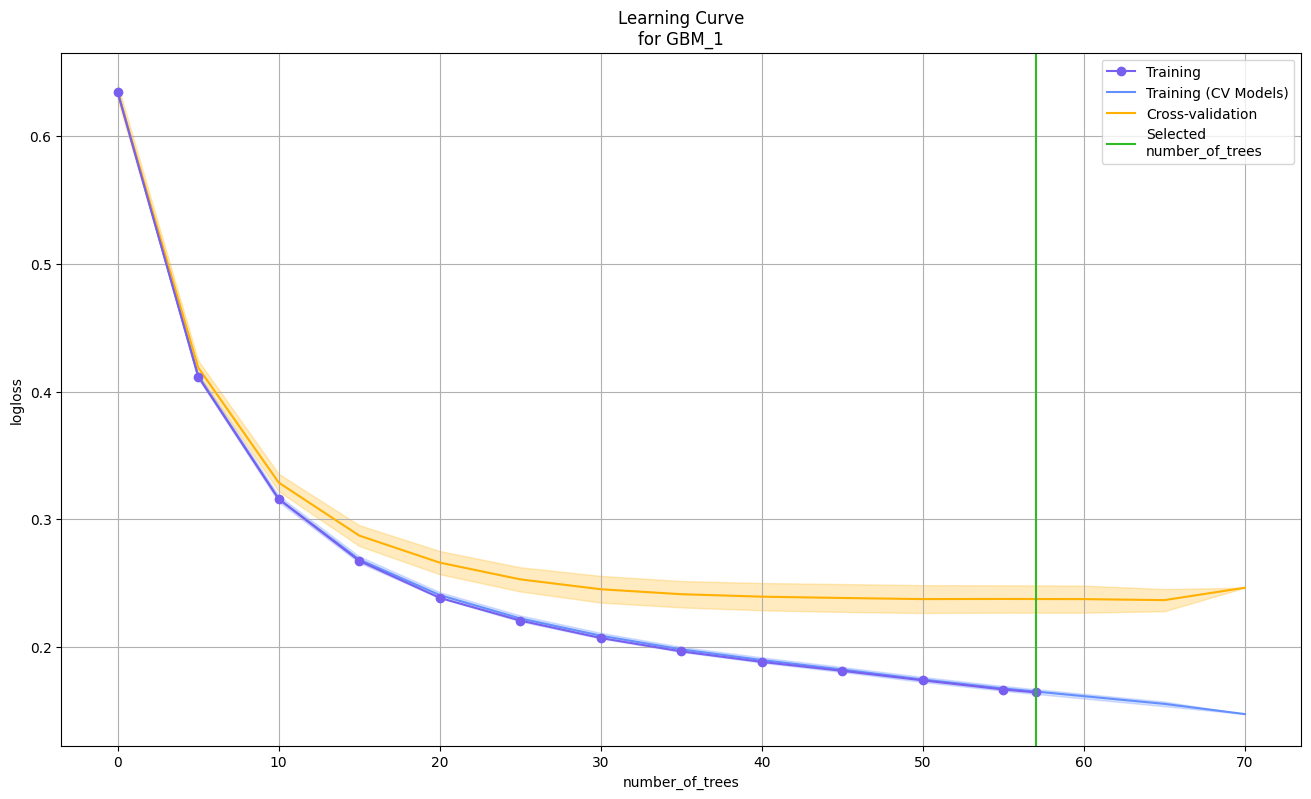

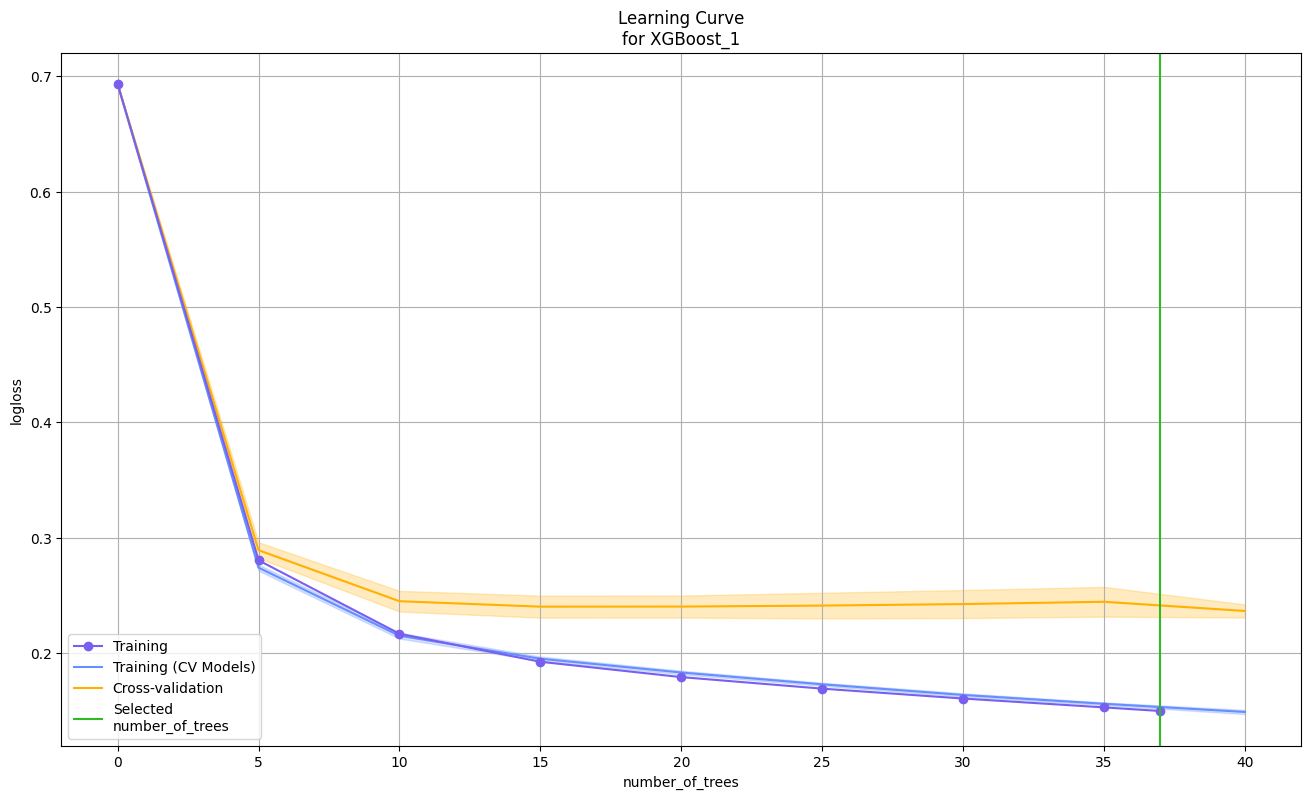

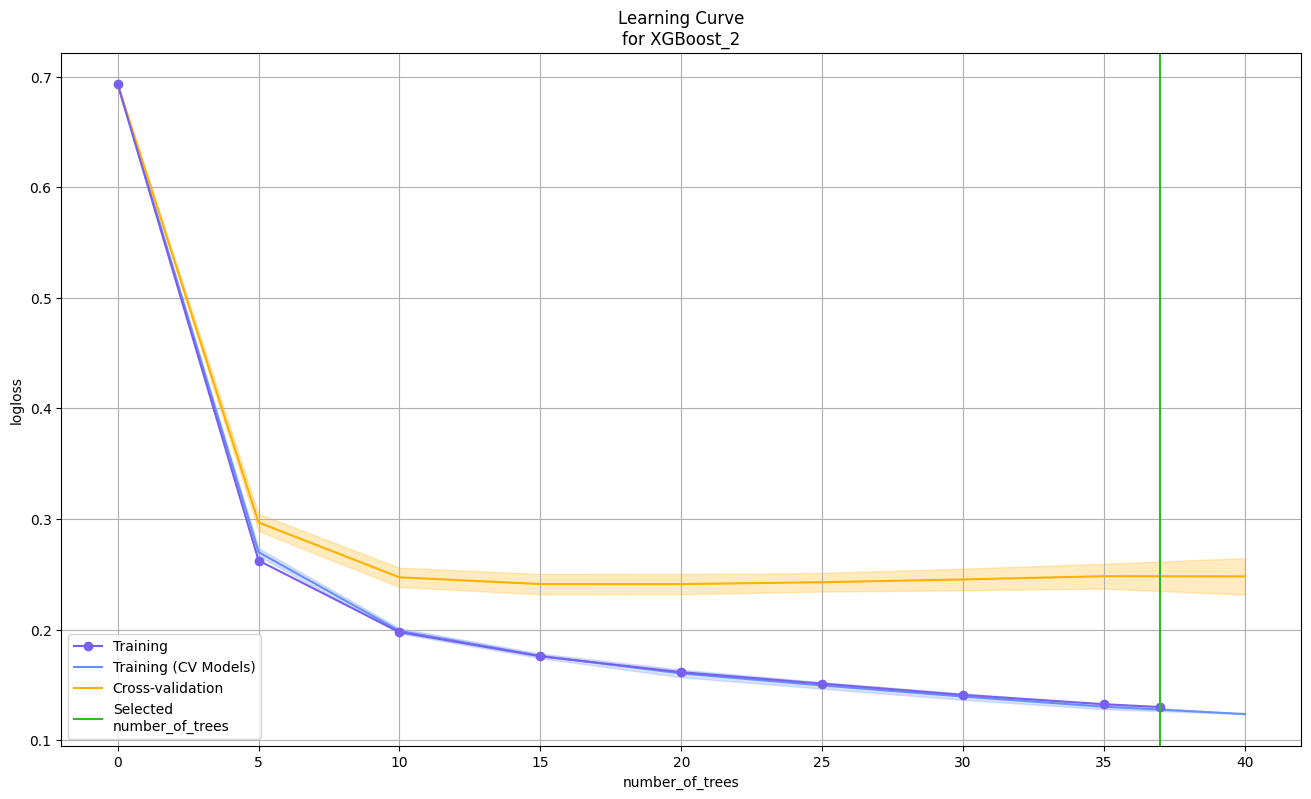

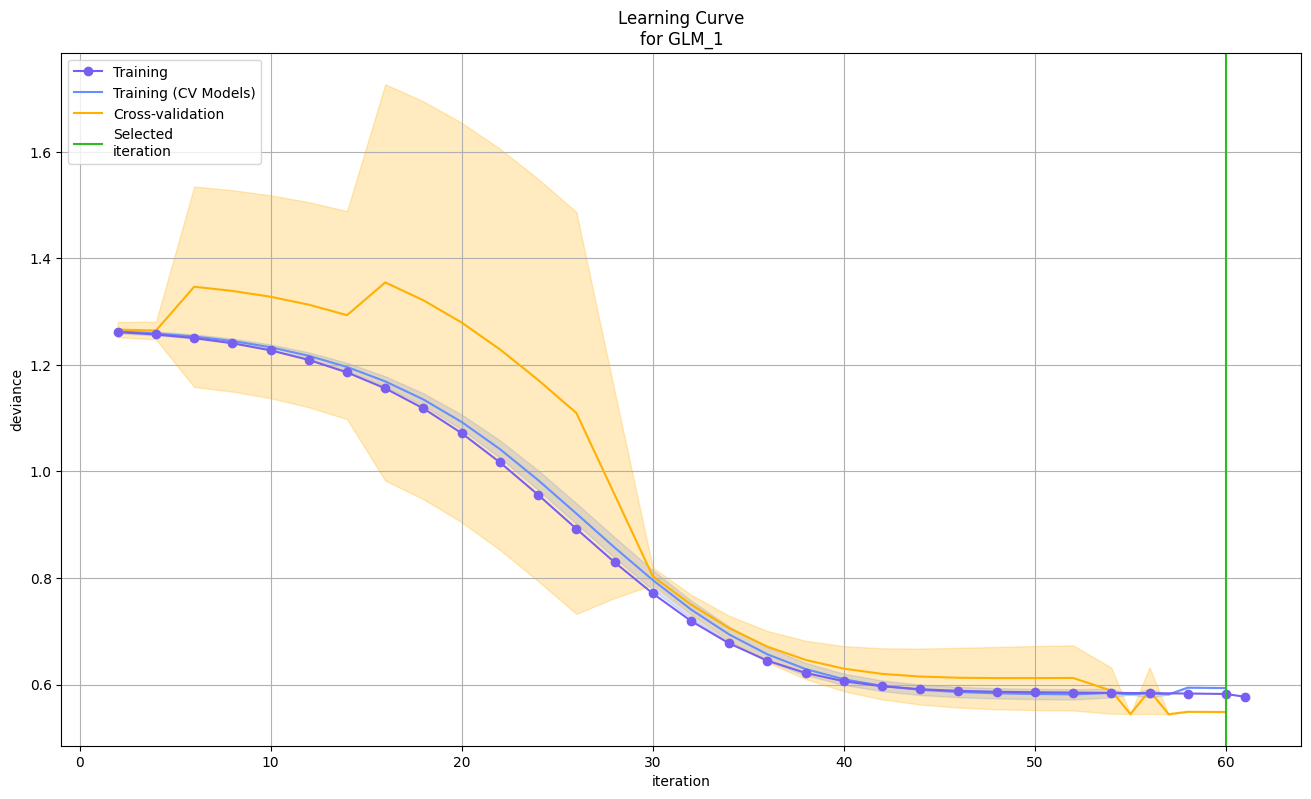

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

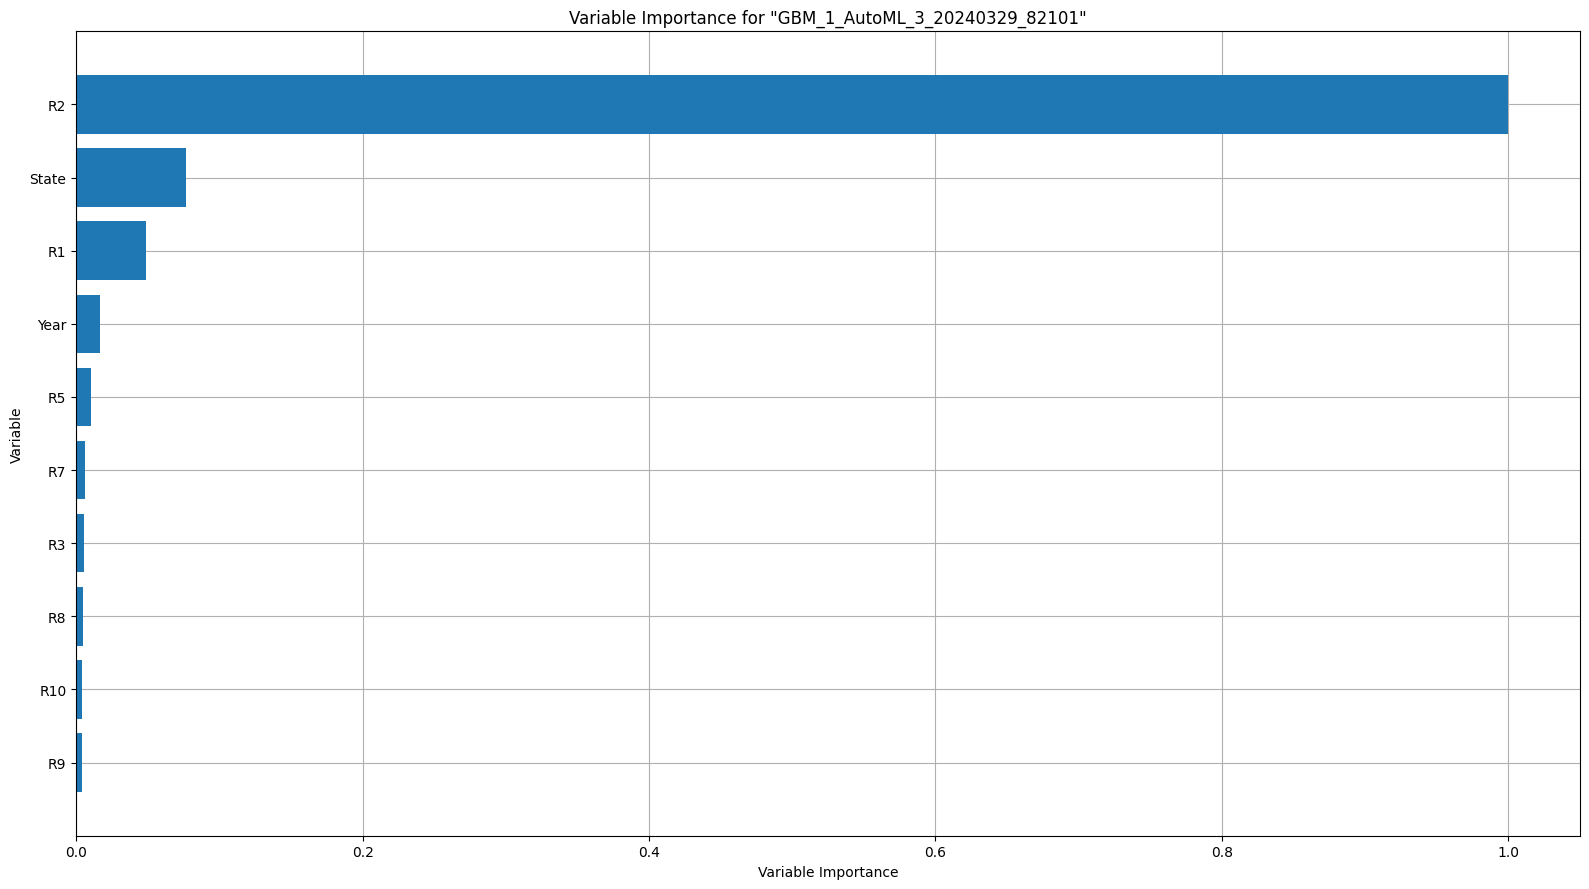

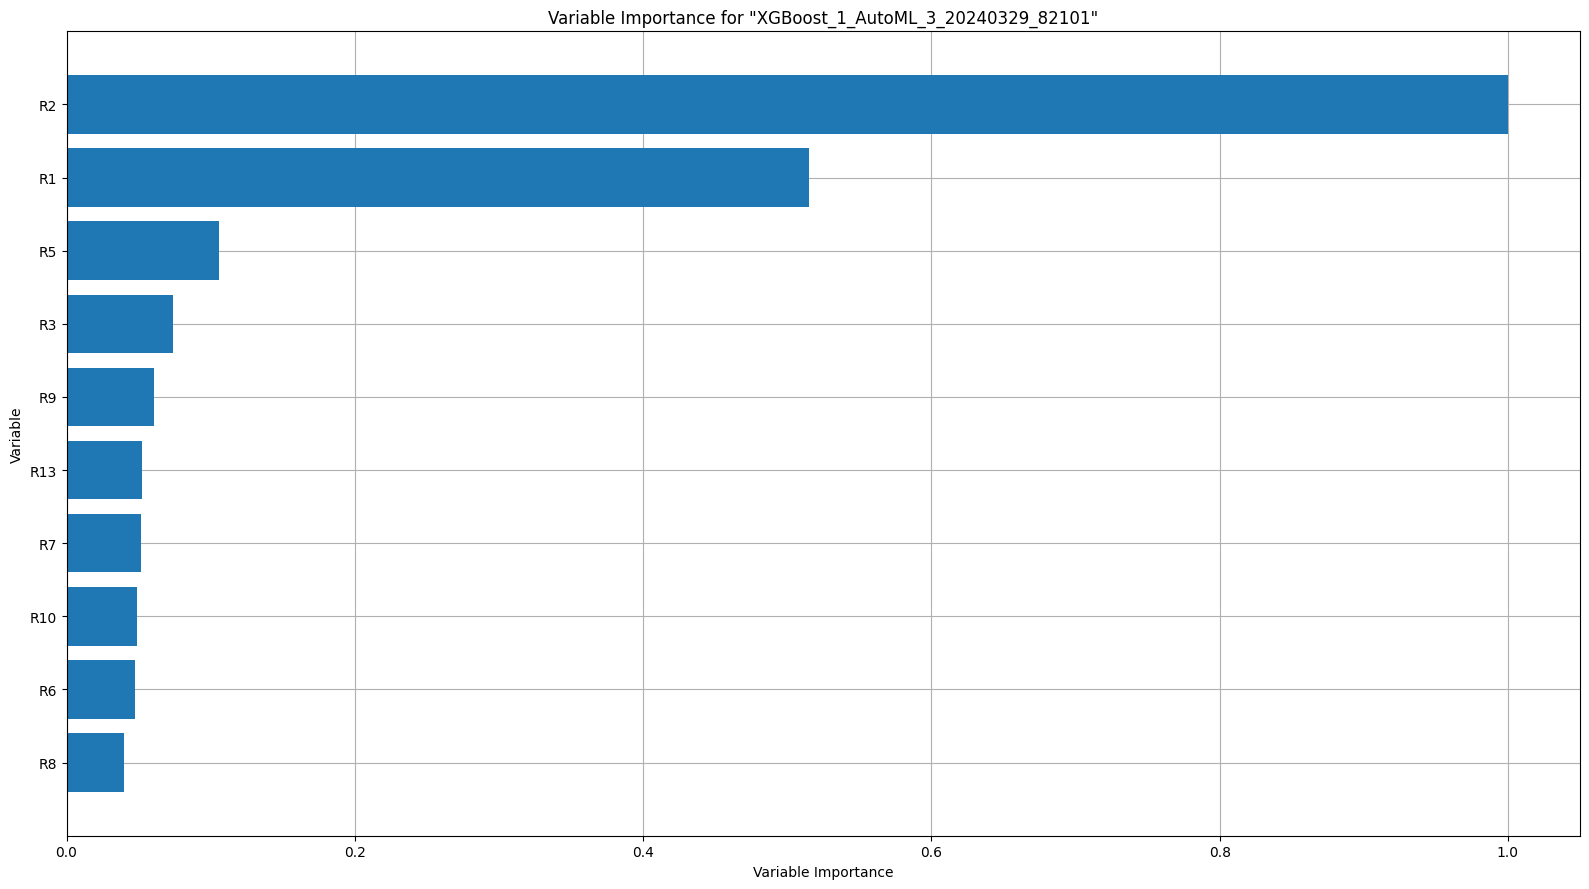

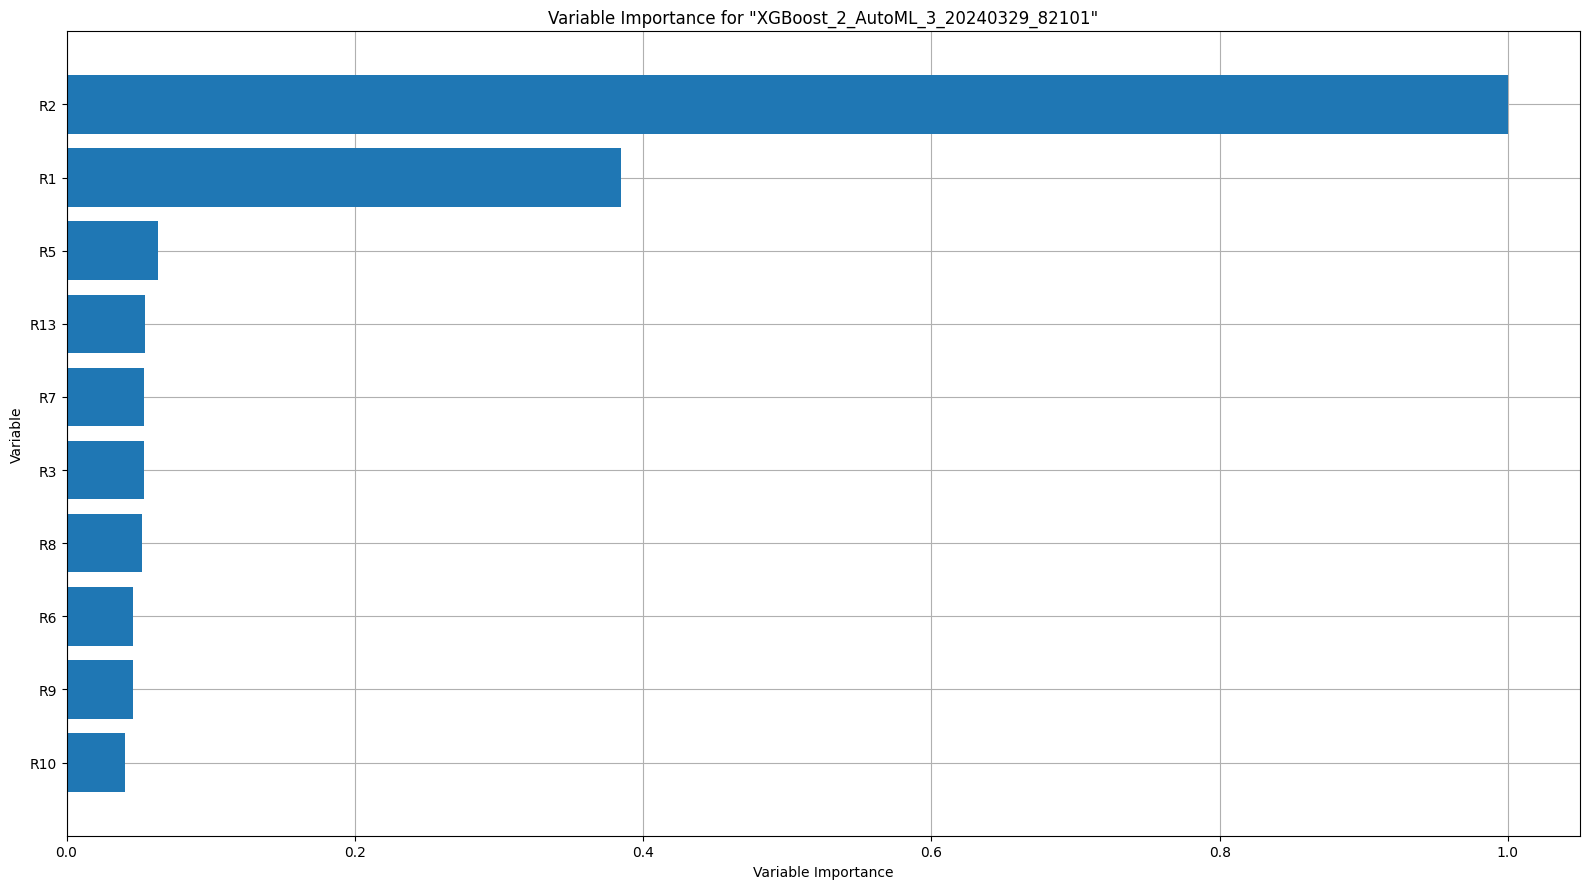

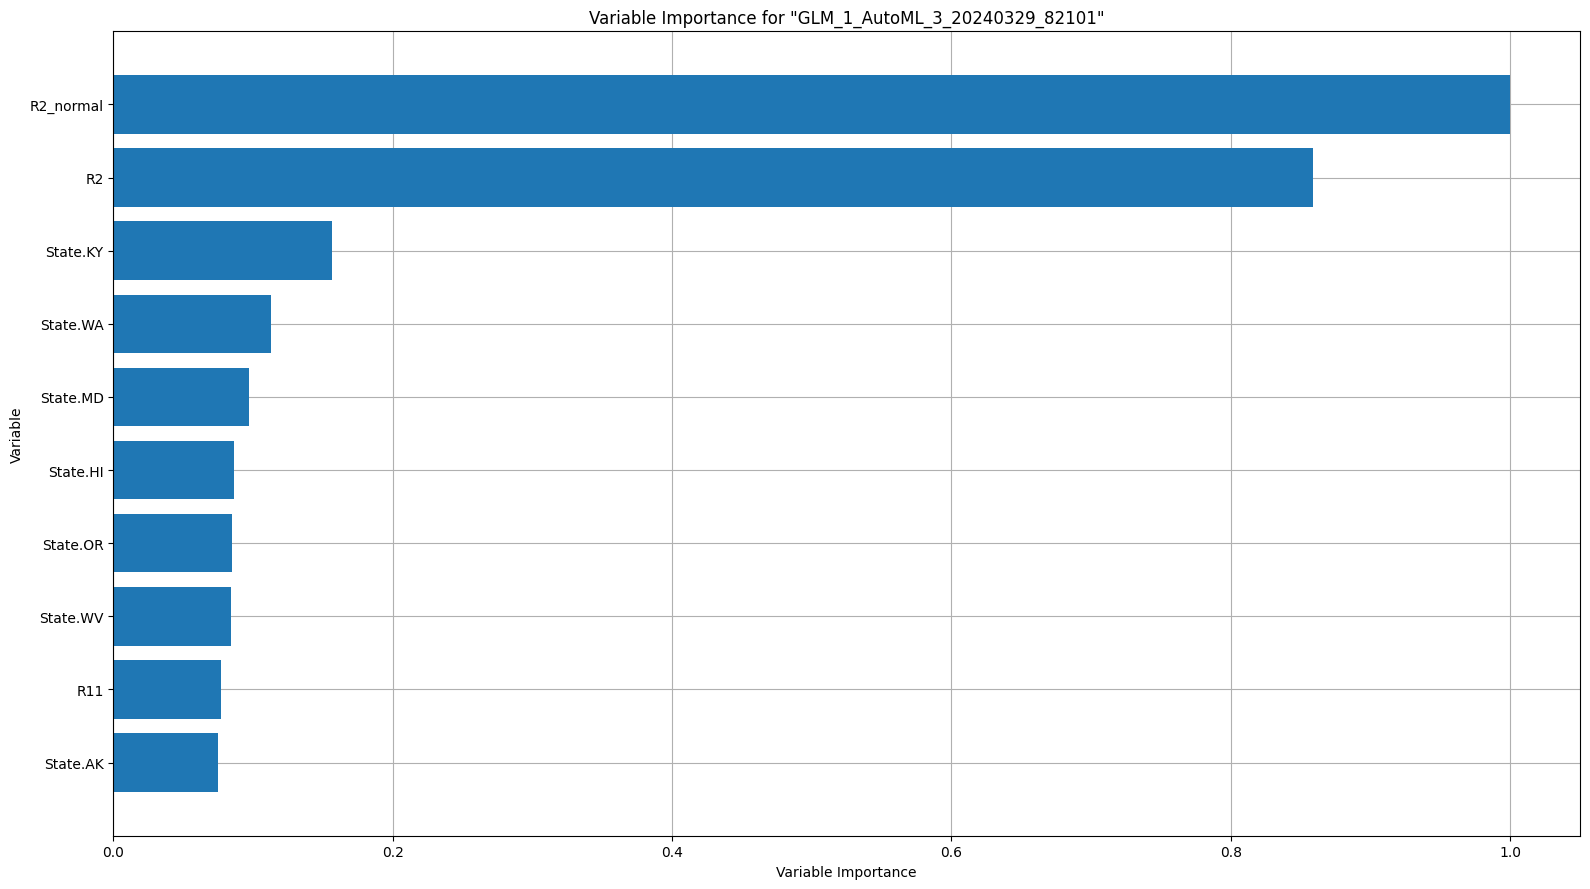

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

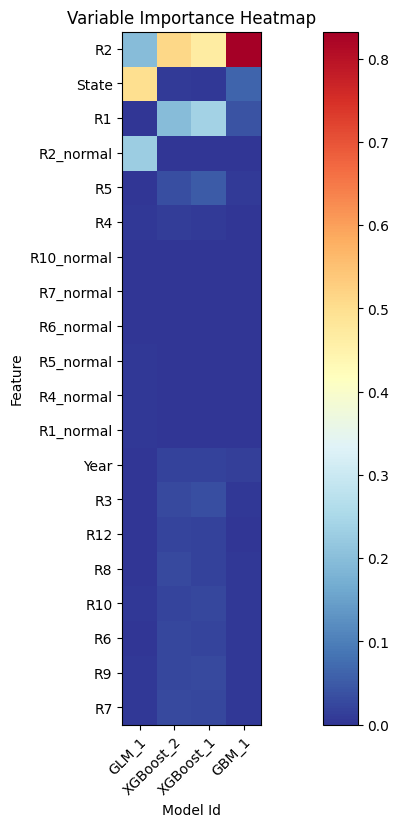

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

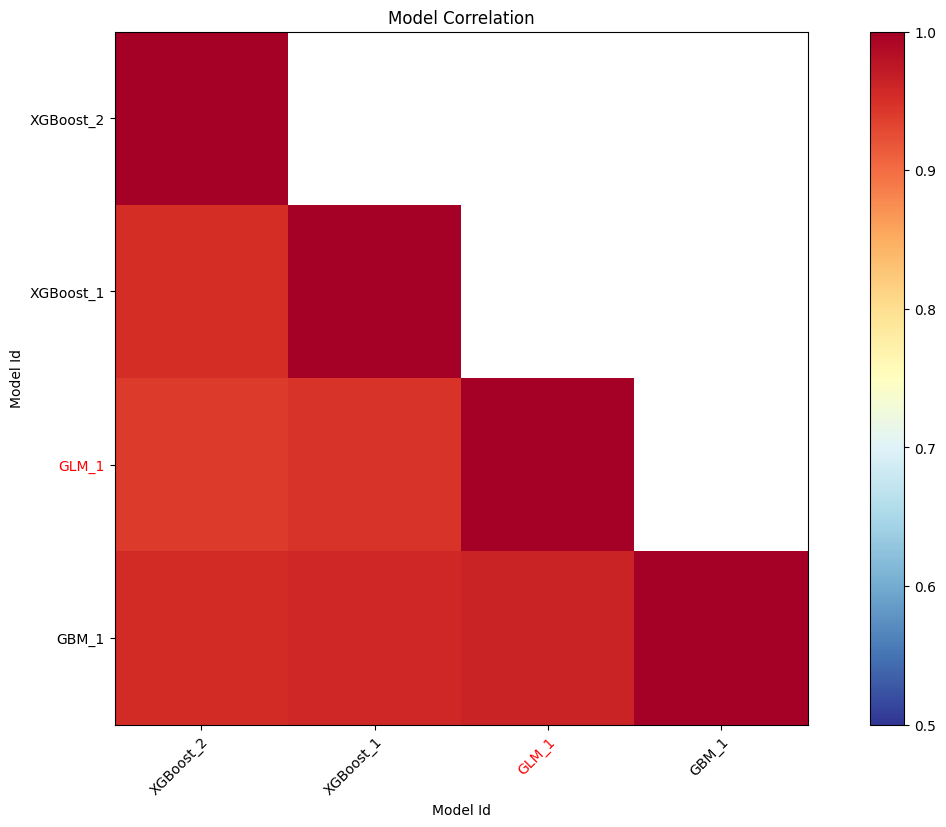

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

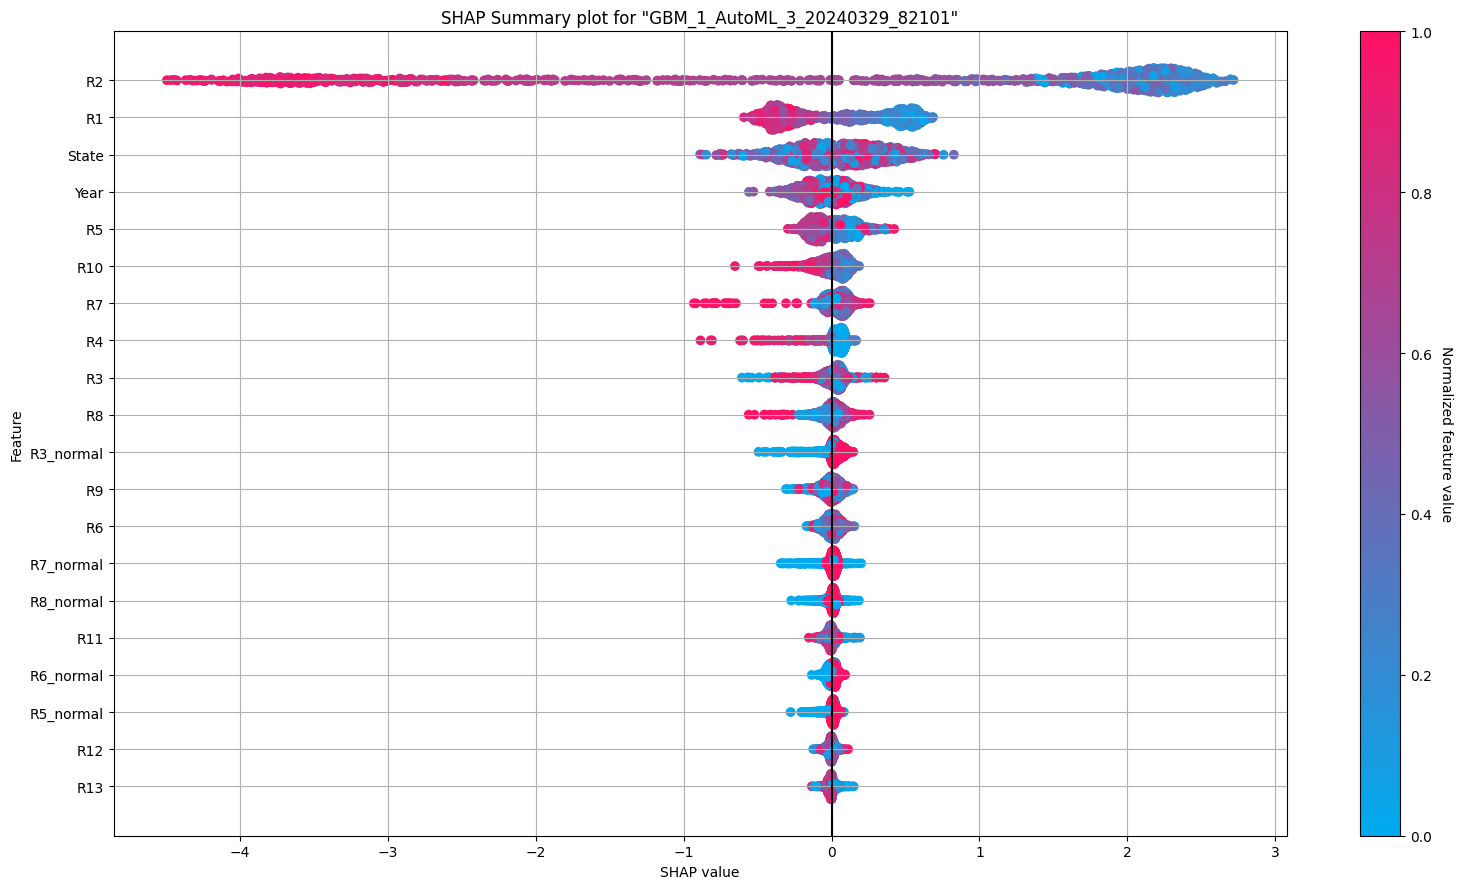

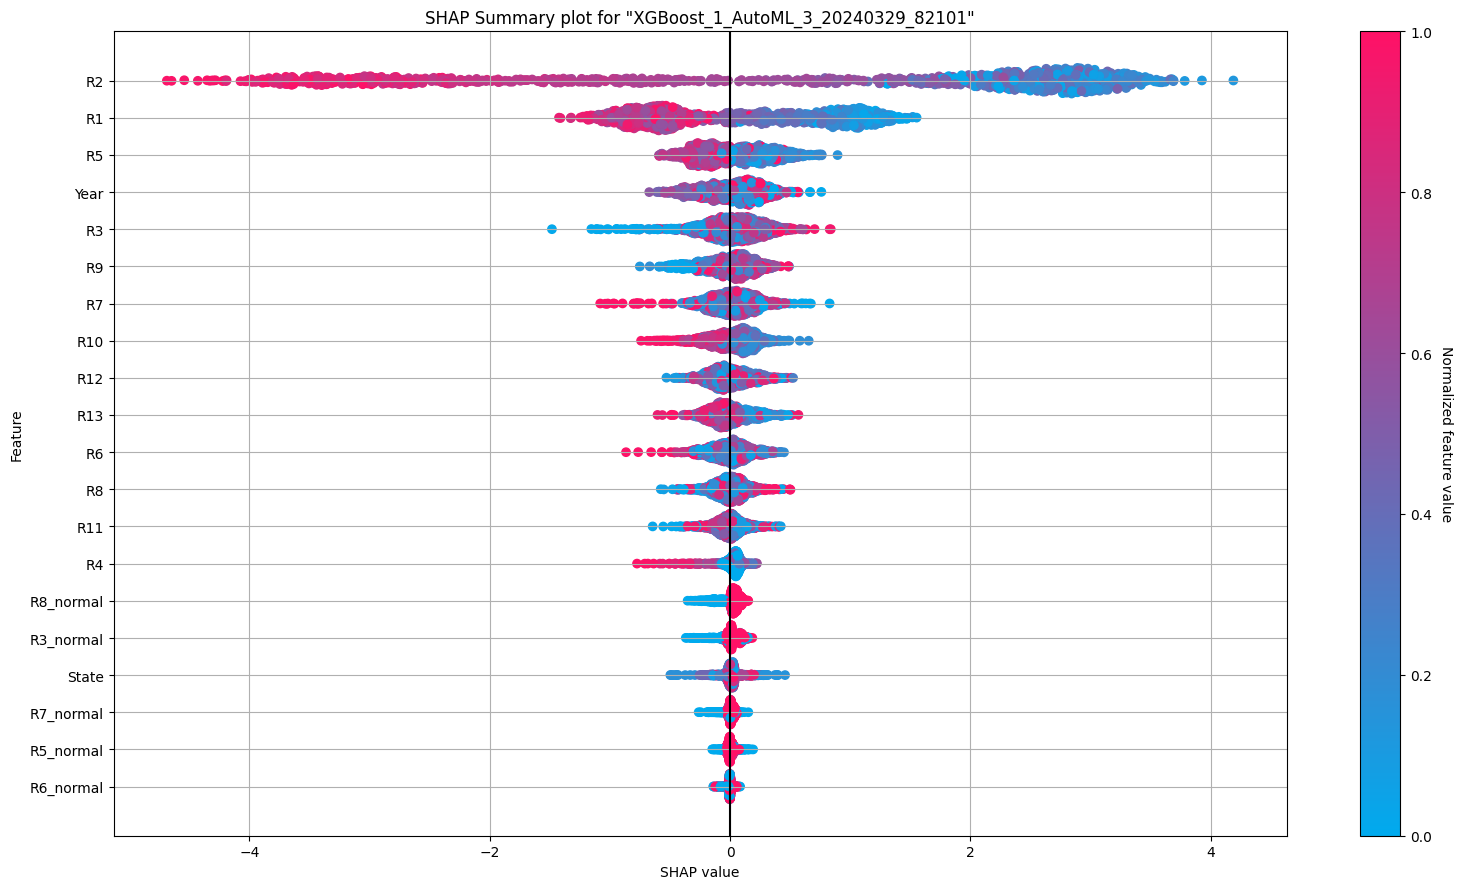

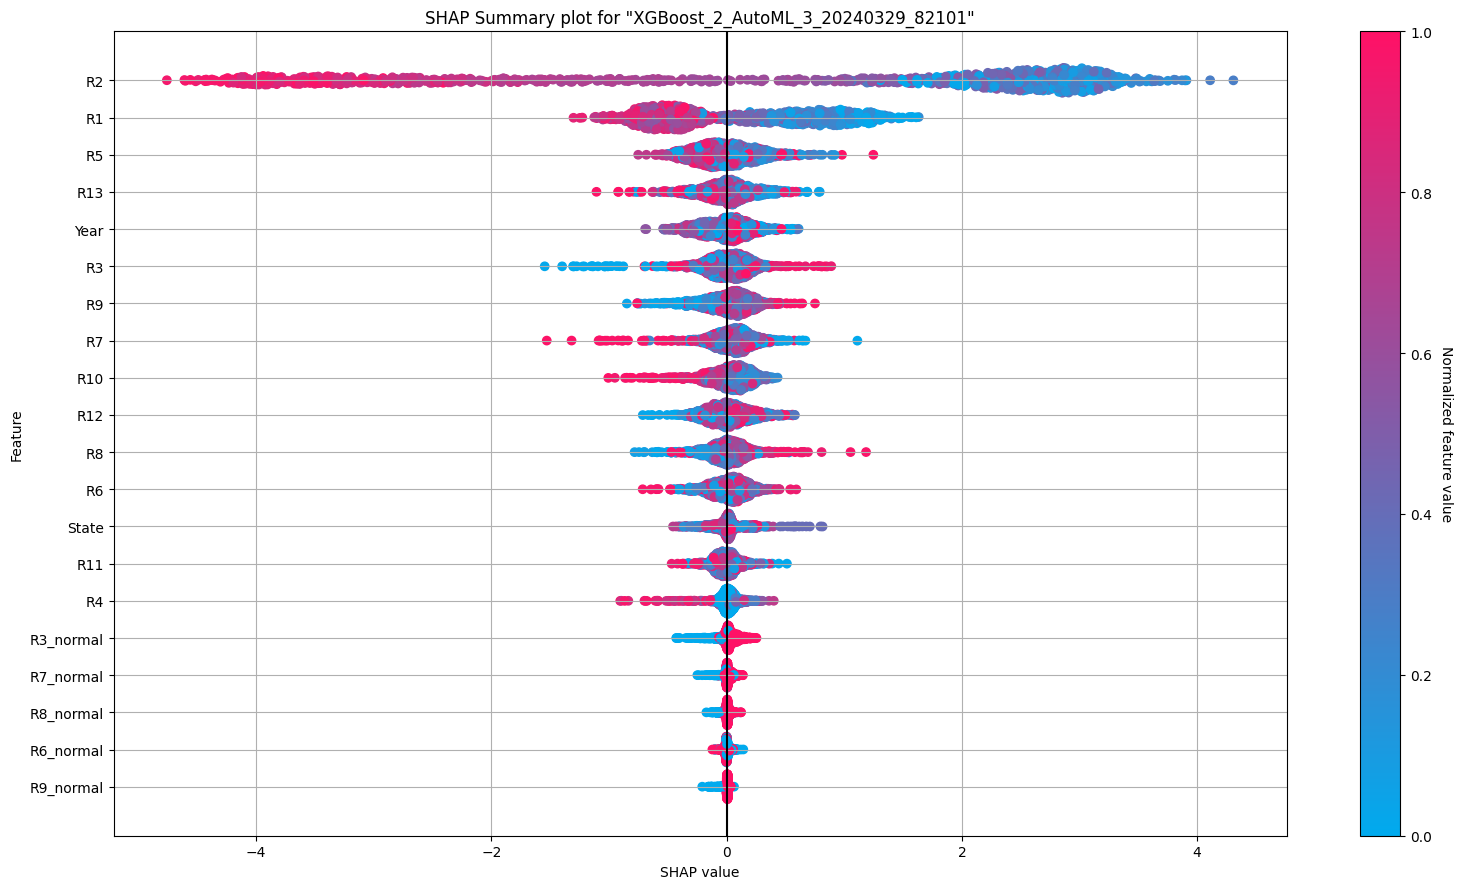

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

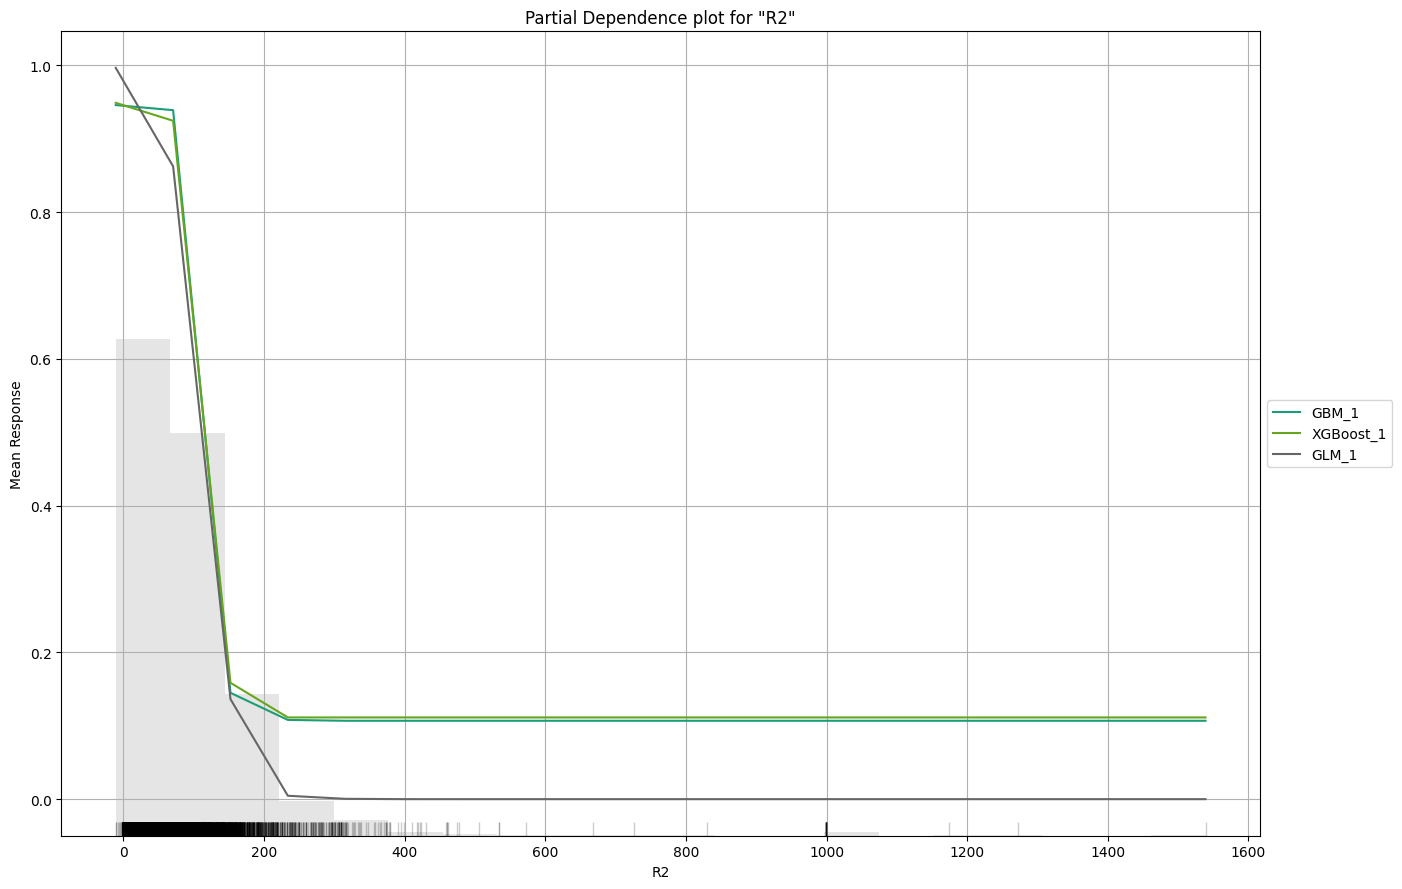

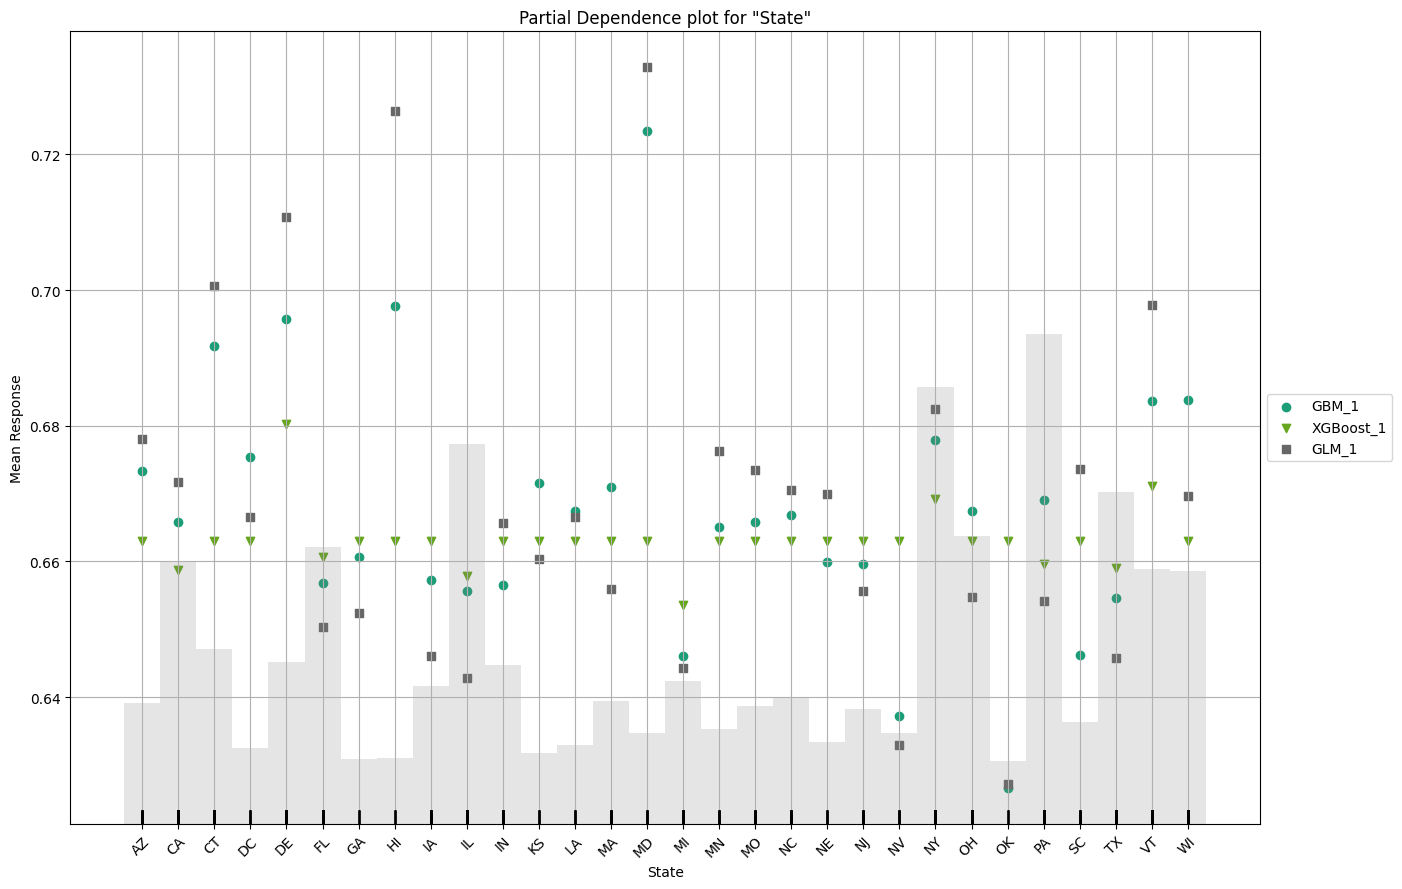

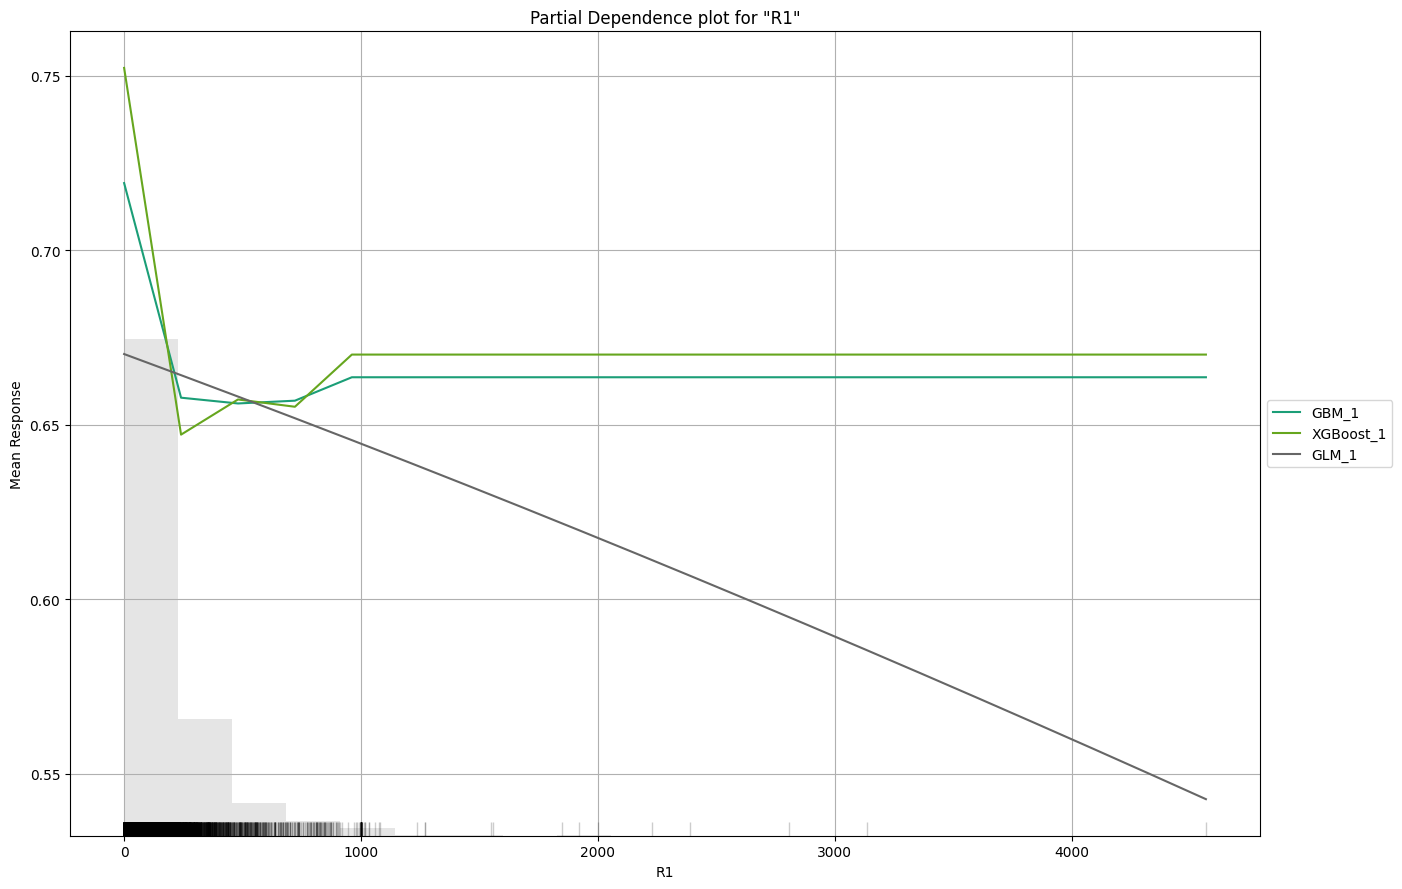

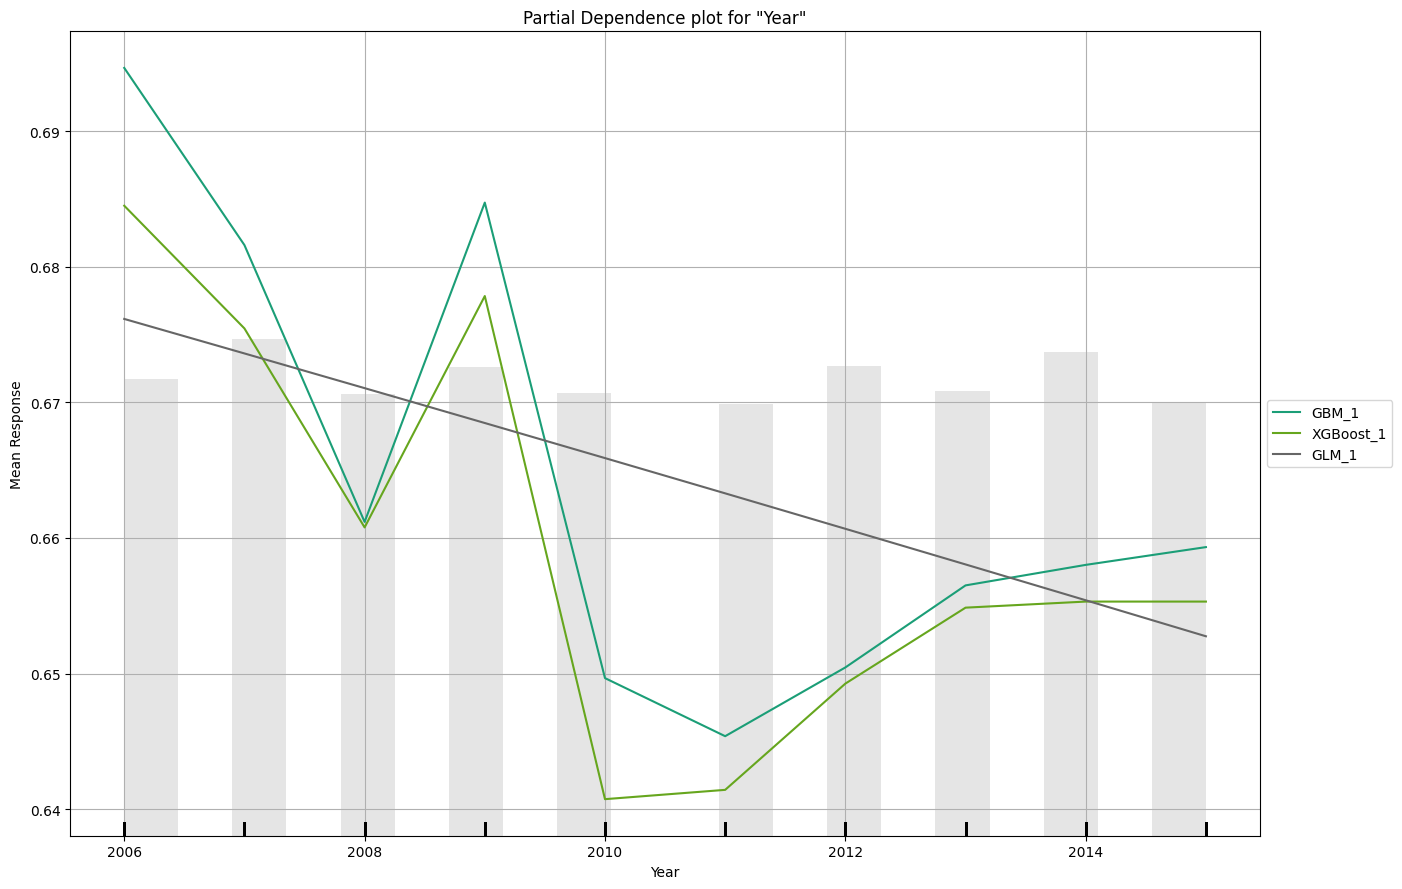

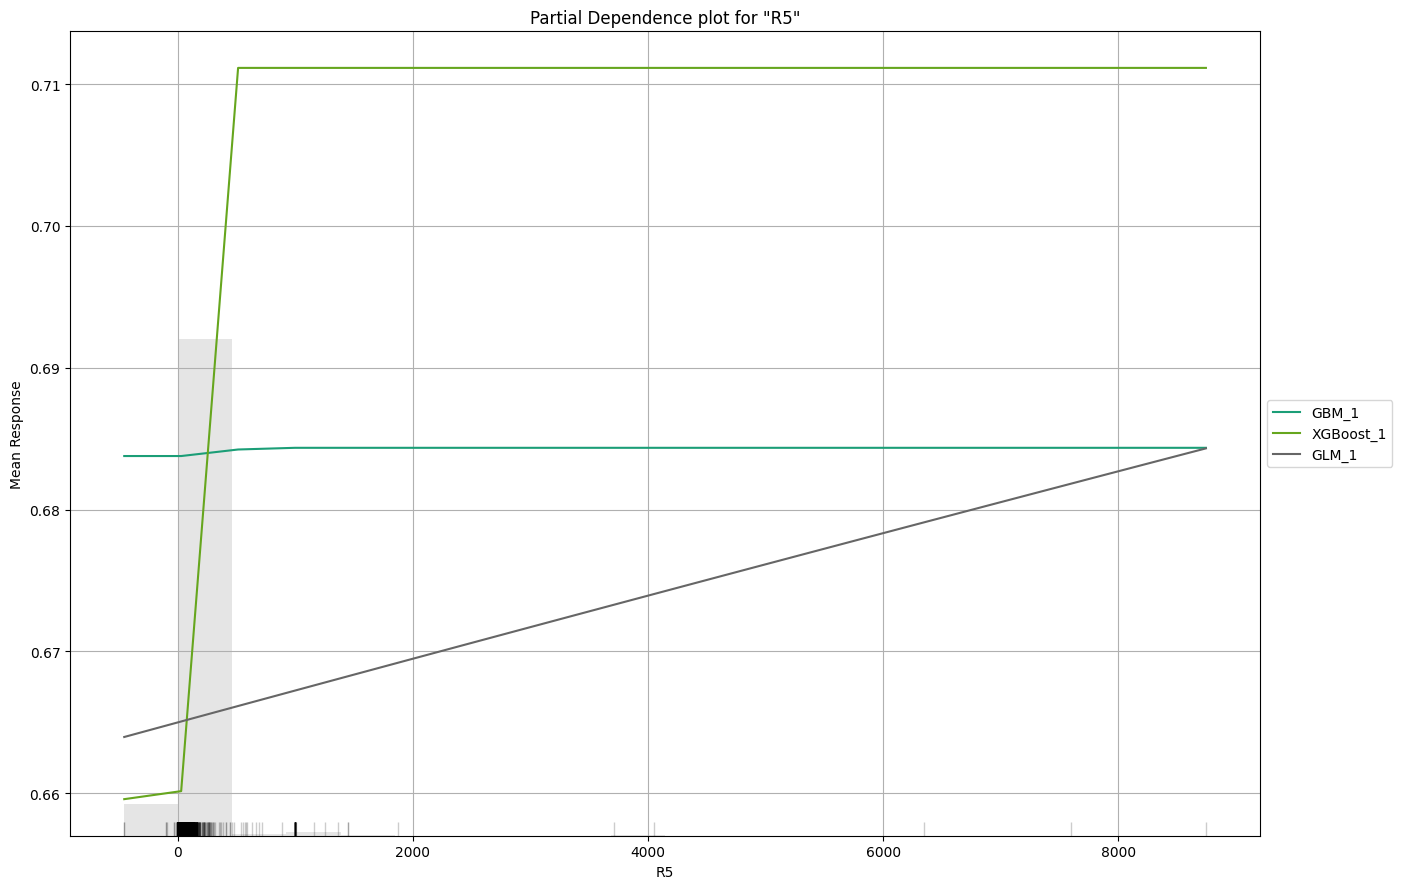

In [ ]:
# Explain multiple models which are 4 base models
exm_1 = h2o.explain(model,test_h2o)

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_3_20240329_82101,0.962218,0.229592,0.97936,0.093942,0.258327,0.066733,13890,0.051506,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_3_20240329_82101,0.961487,0.230822,0.978954,0.100276,0.258517,0.0668309,13013,0.049772,StackedEnsemble
GBM_1_AutoML_3_20240329_82101,0.960448,0.234162,0.978105,0.108969,0.260456,0.0678375,4180,0.028304,GBM
XGBoost_1_AutoML_3_20240329_82101,0.957849,0.244188,0.976931,0.10299,0.265045,0.0702488,3653,0.007552,XGBoost
XGBoost_2_AutoML_3_20240329_82101,0.957798,0.247037,0.976533,0.107286,0.268679,0.0721885,3193,0.00784,XGBoost
GLM_1_AutoML_3_20240329_82101,0.947253,0.321332,0.961066,0.103449,0.276325,0.0763555,1730,0.003535,GLM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_3_20240329_82101

,Insolvent,Solvent,Error,Rate
Insolvent,1125.0,148.0,0.1163,(148.0/1273.0)
Solvent,184.0,2385.0,0.0716,(184.0/2569.0)
Total,1309.0,2533.0,0.0864,(332.0/3842.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

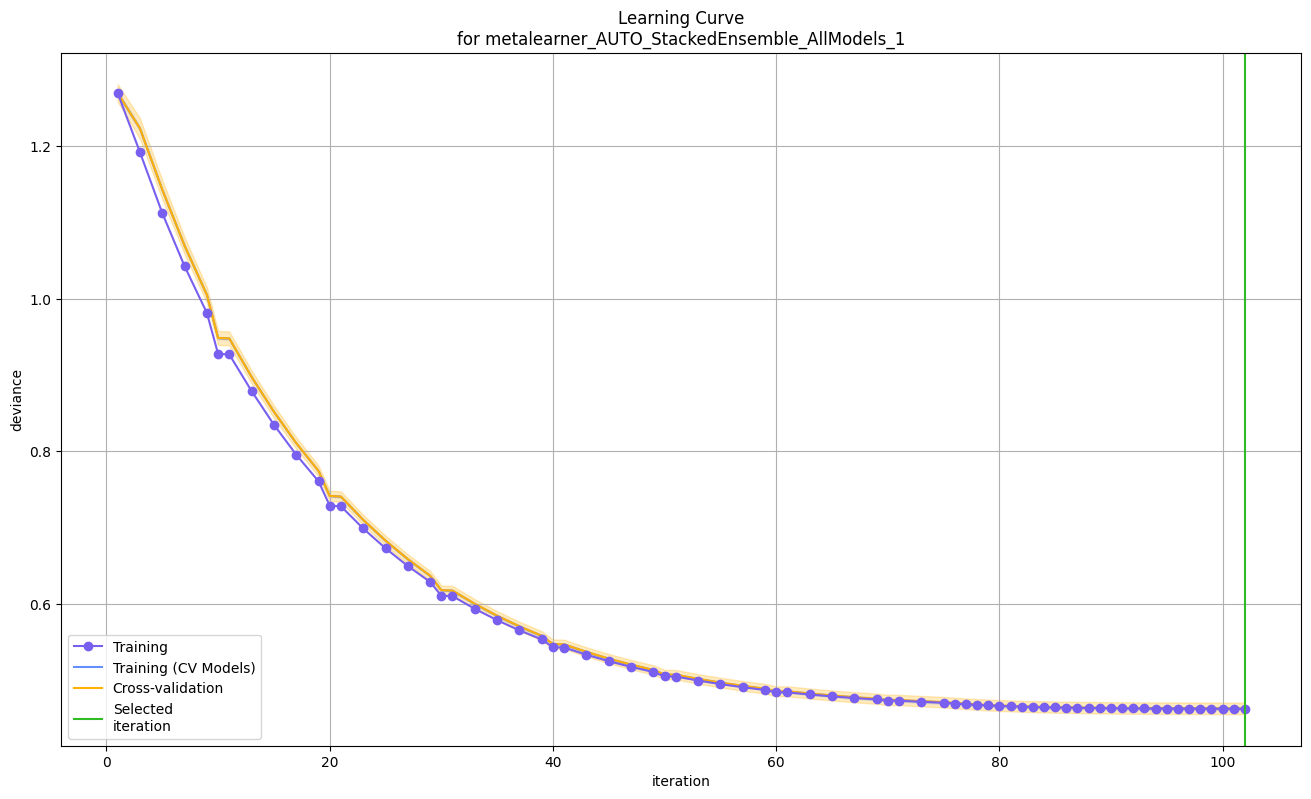

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

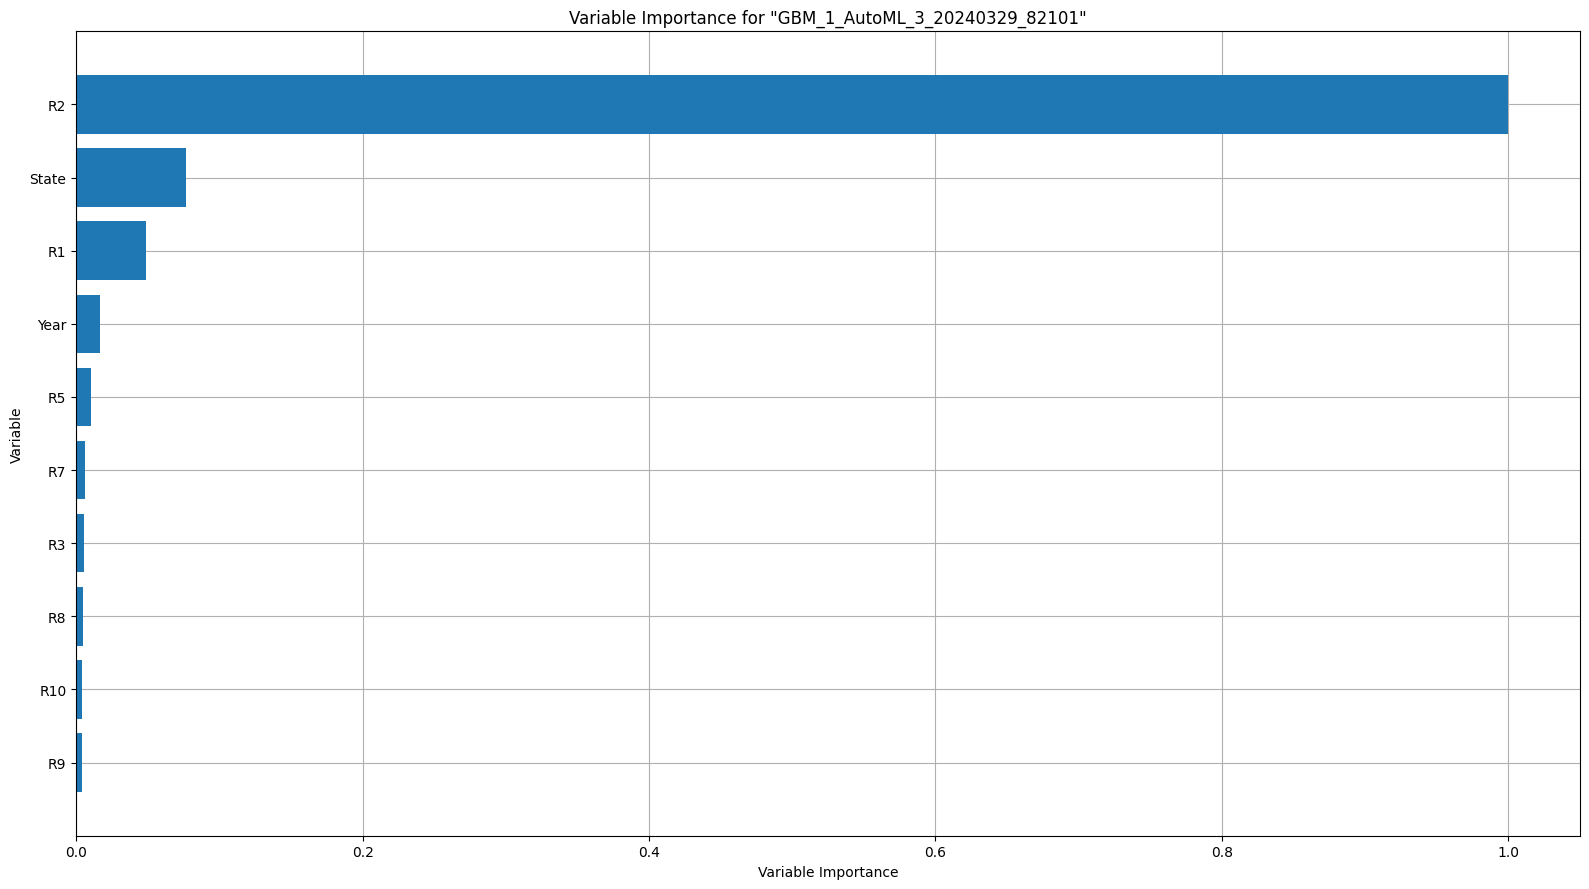

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

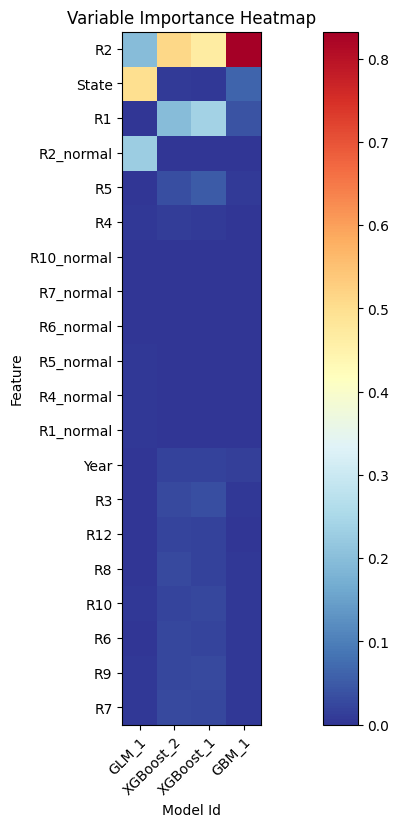

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

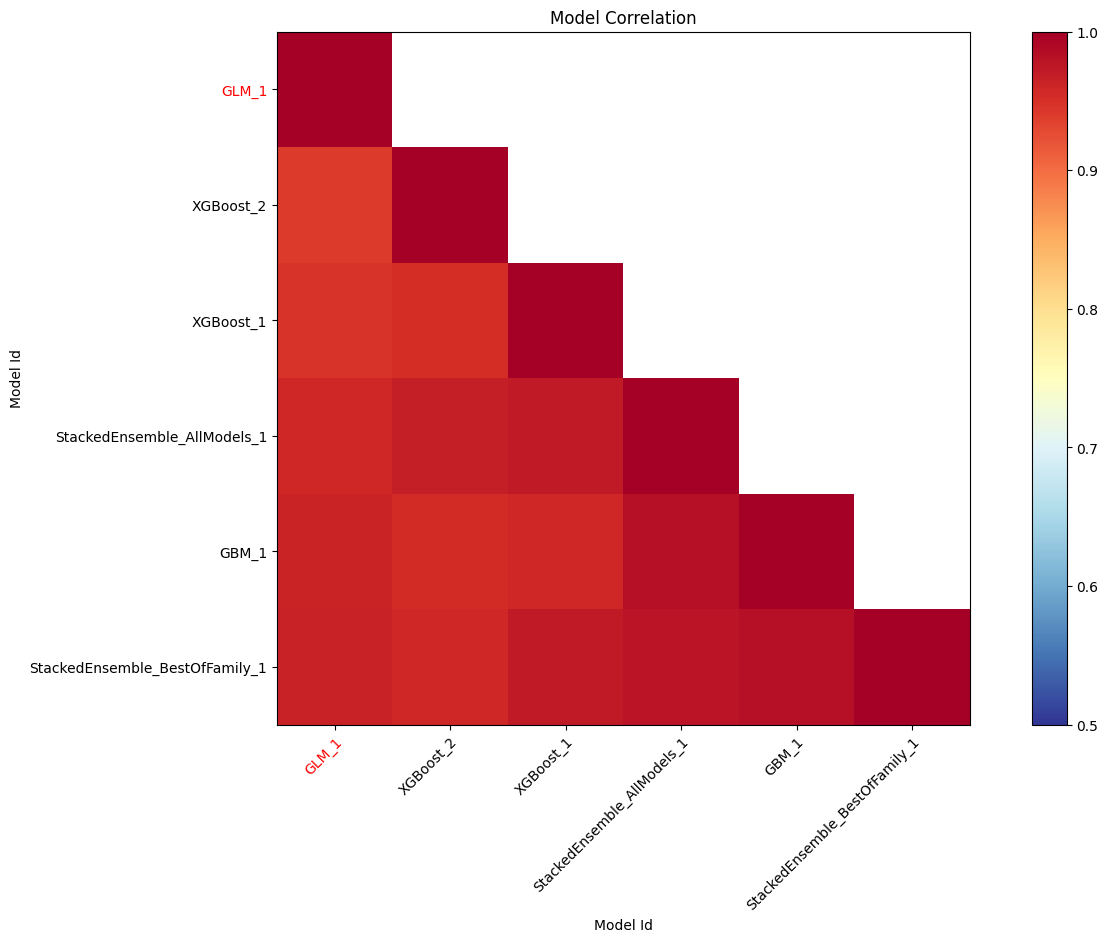

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

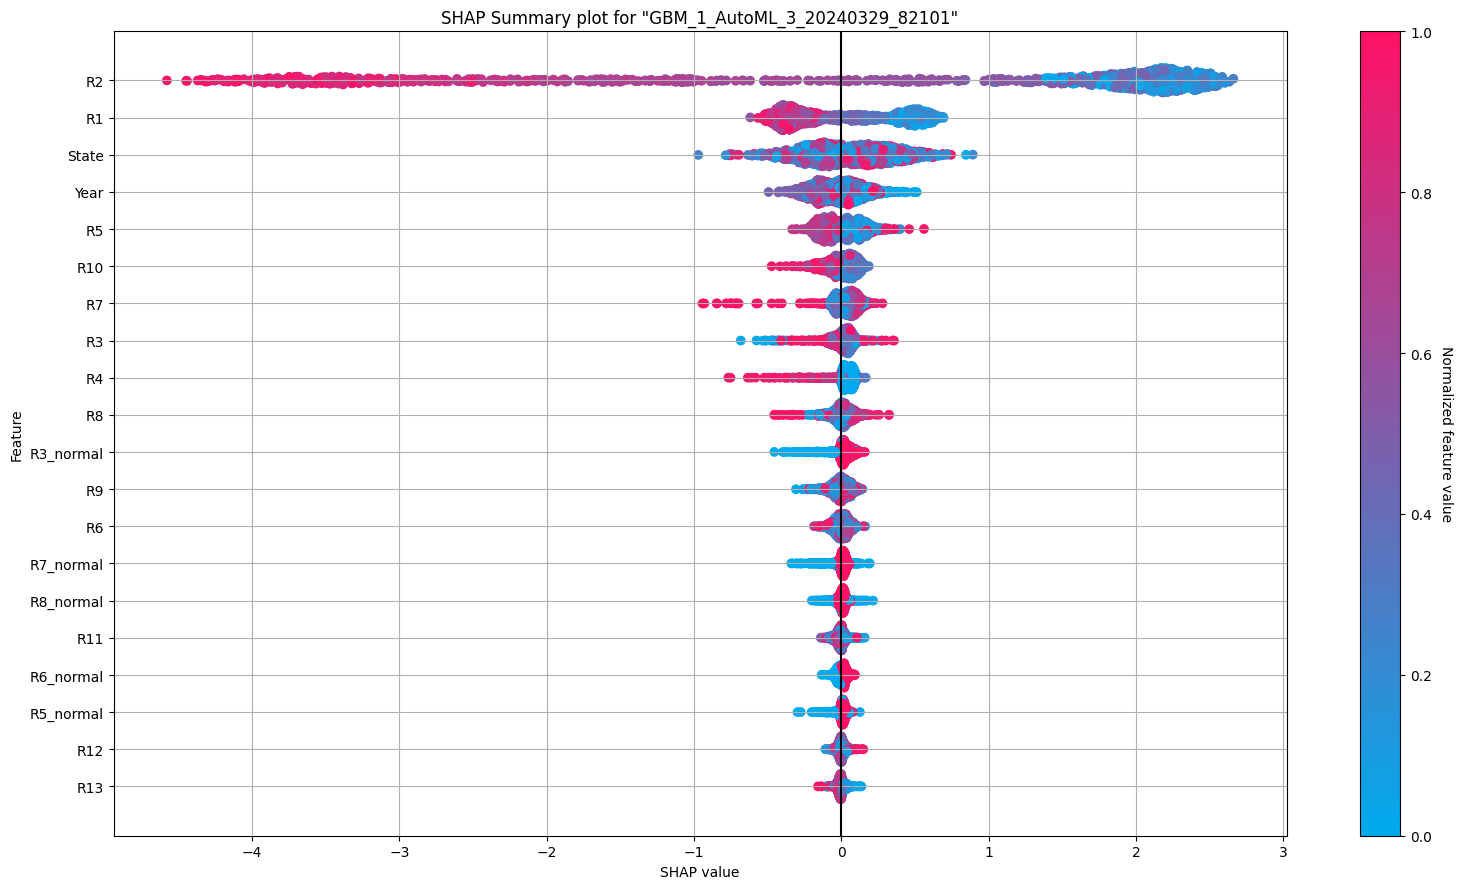

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

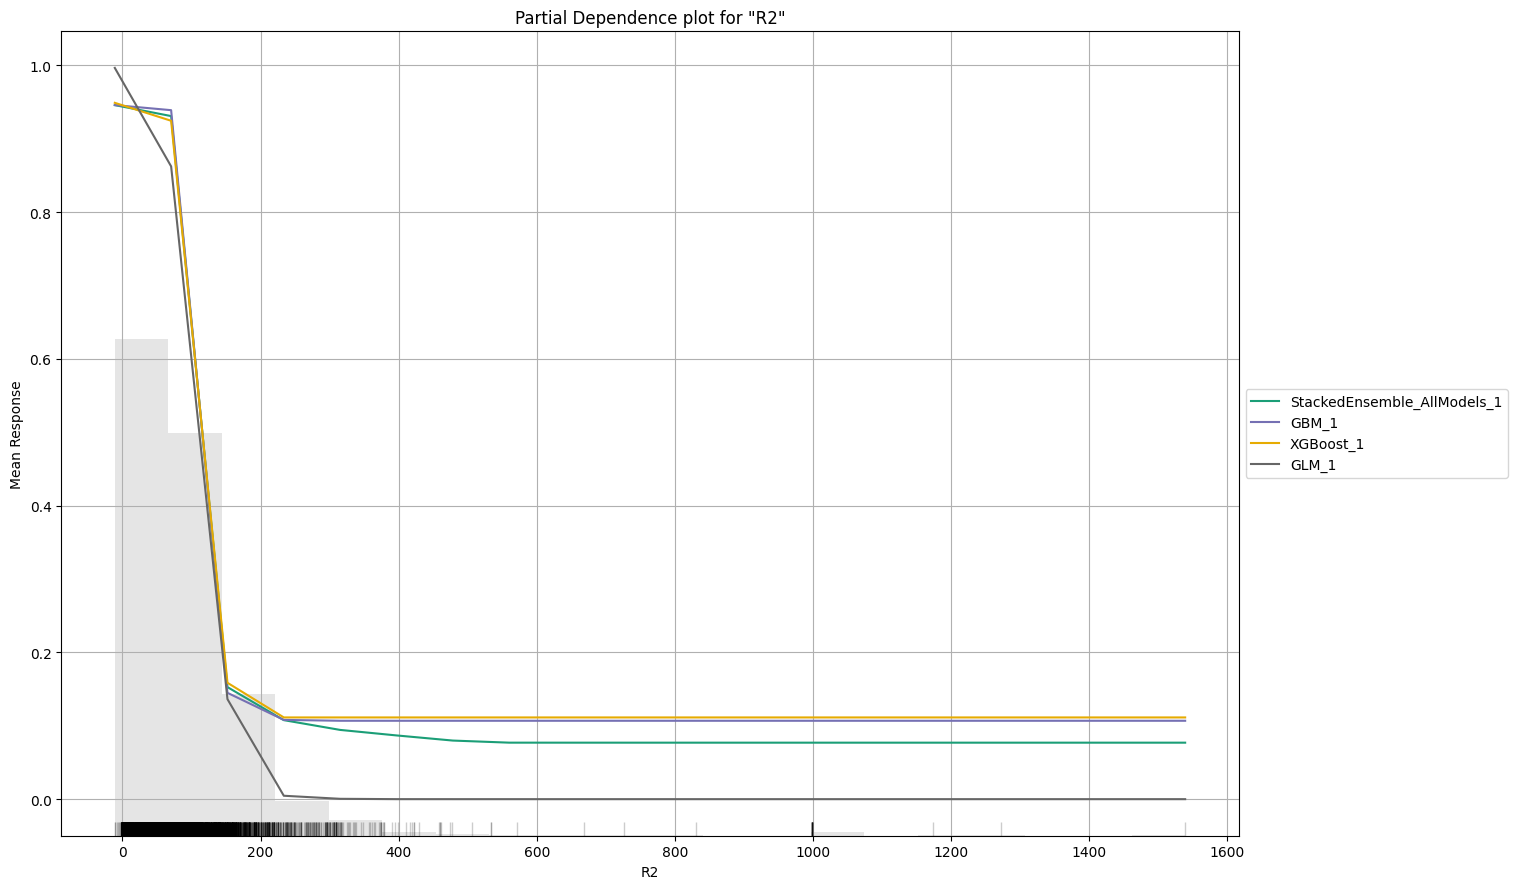

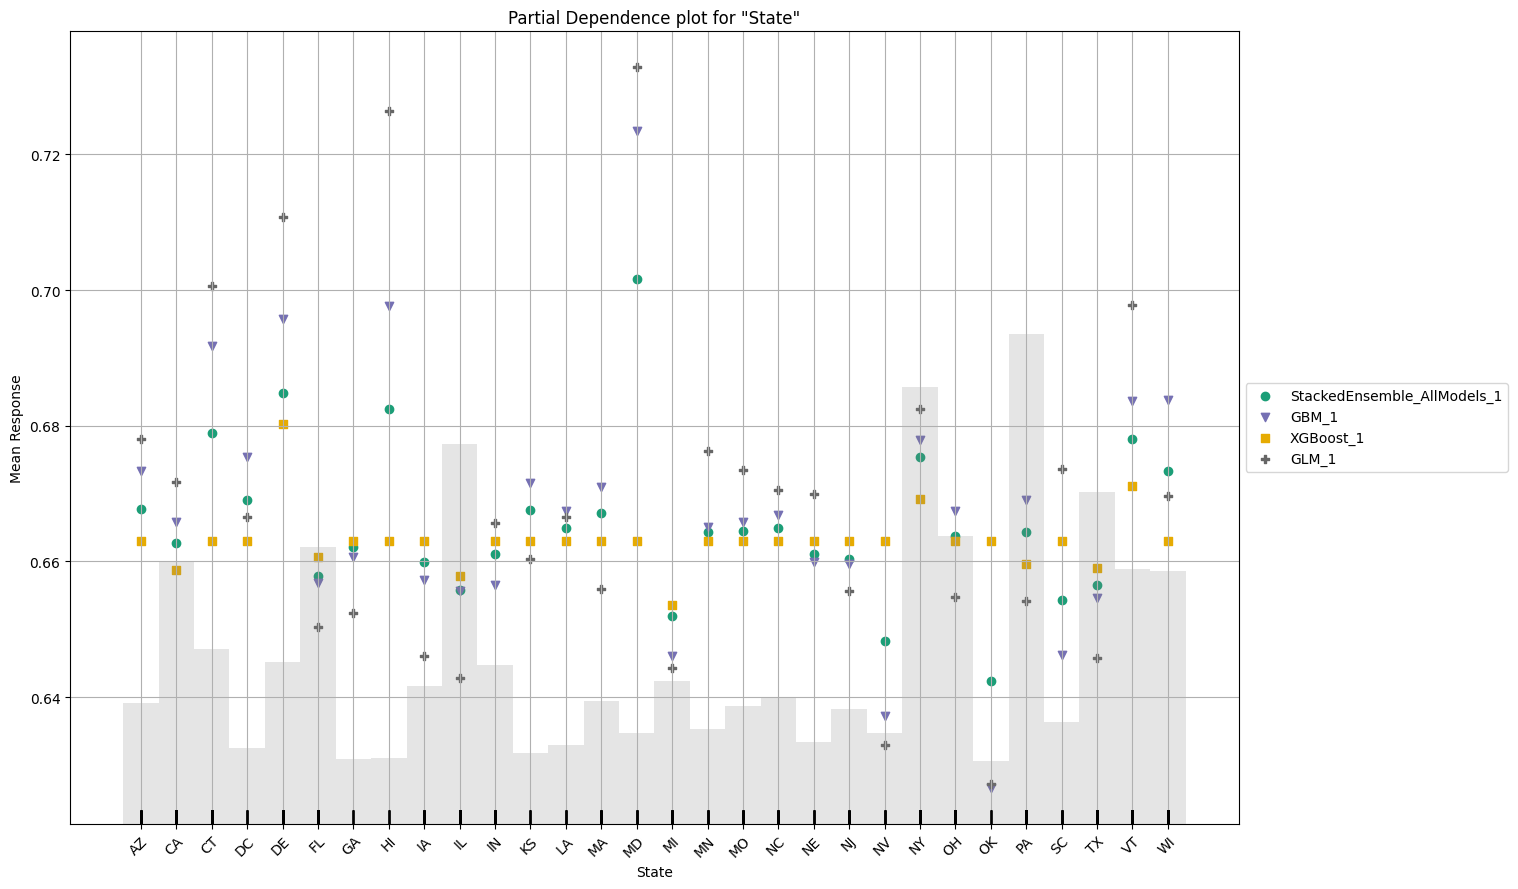

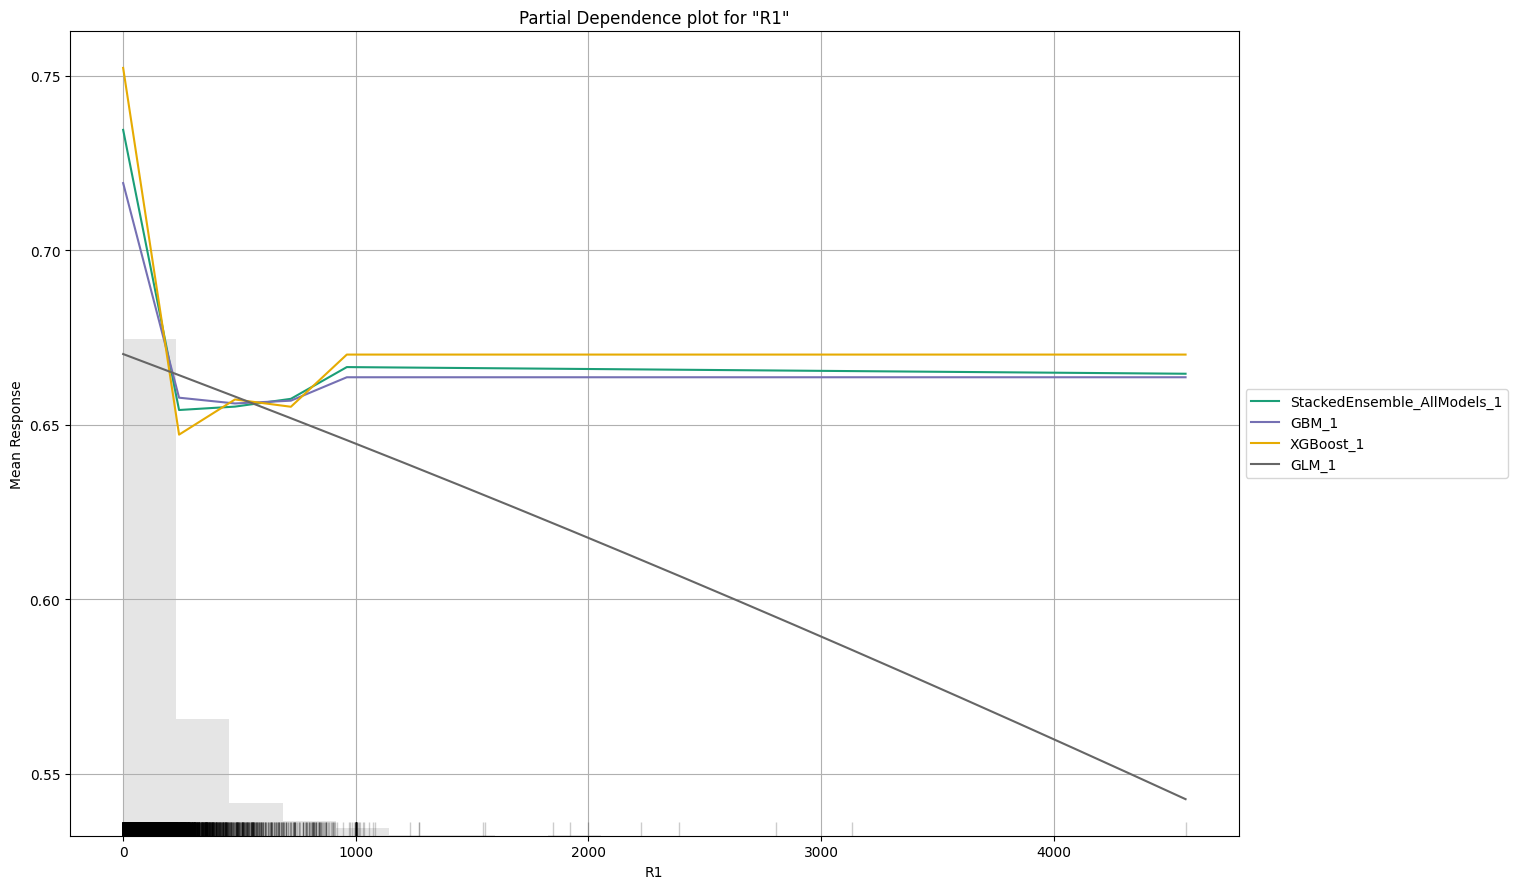

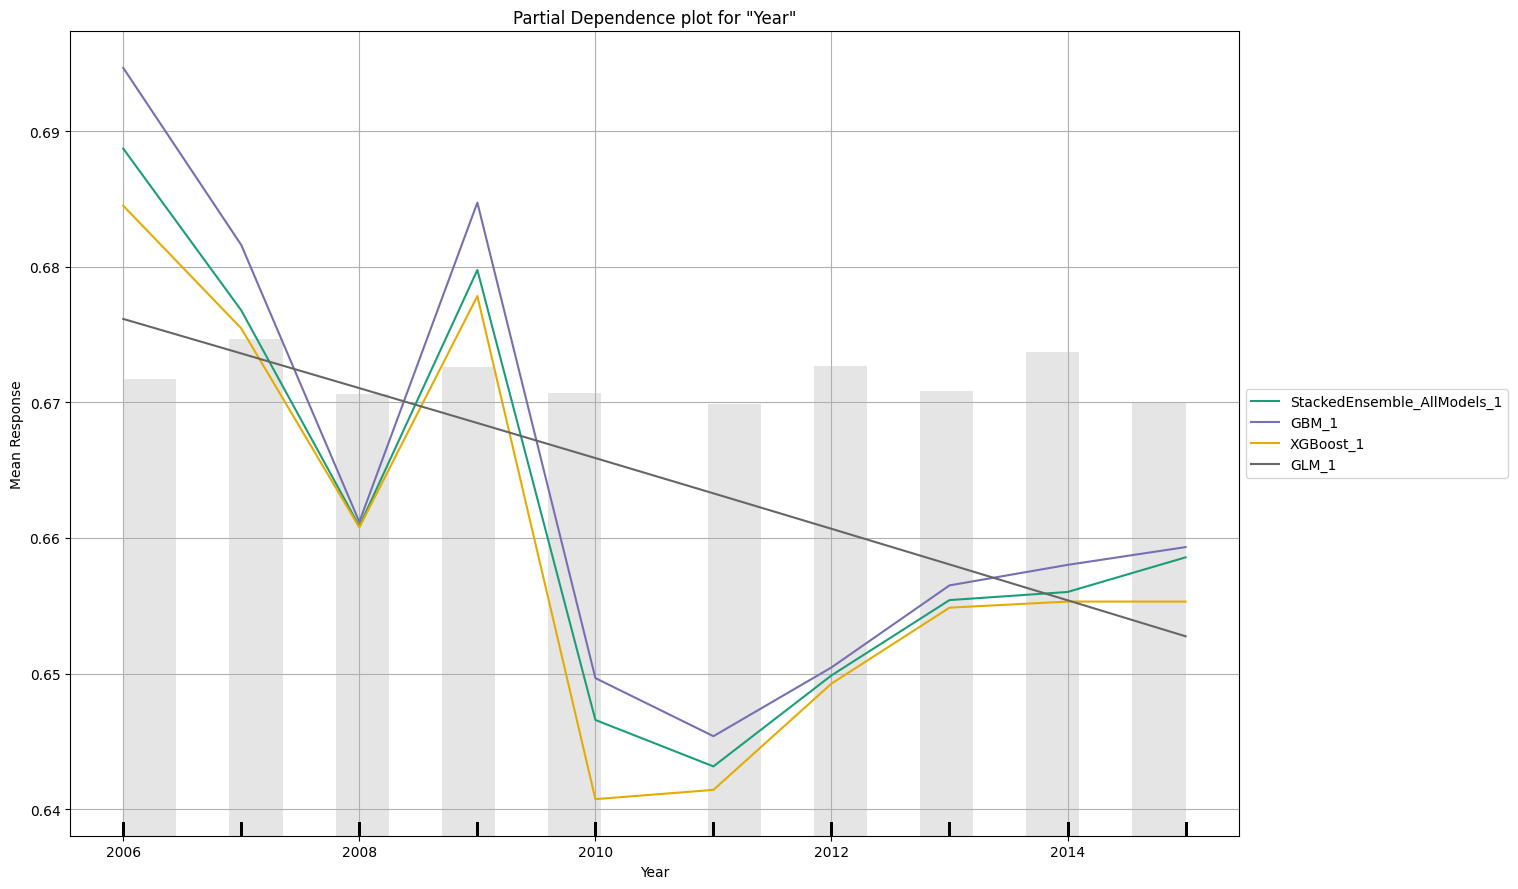

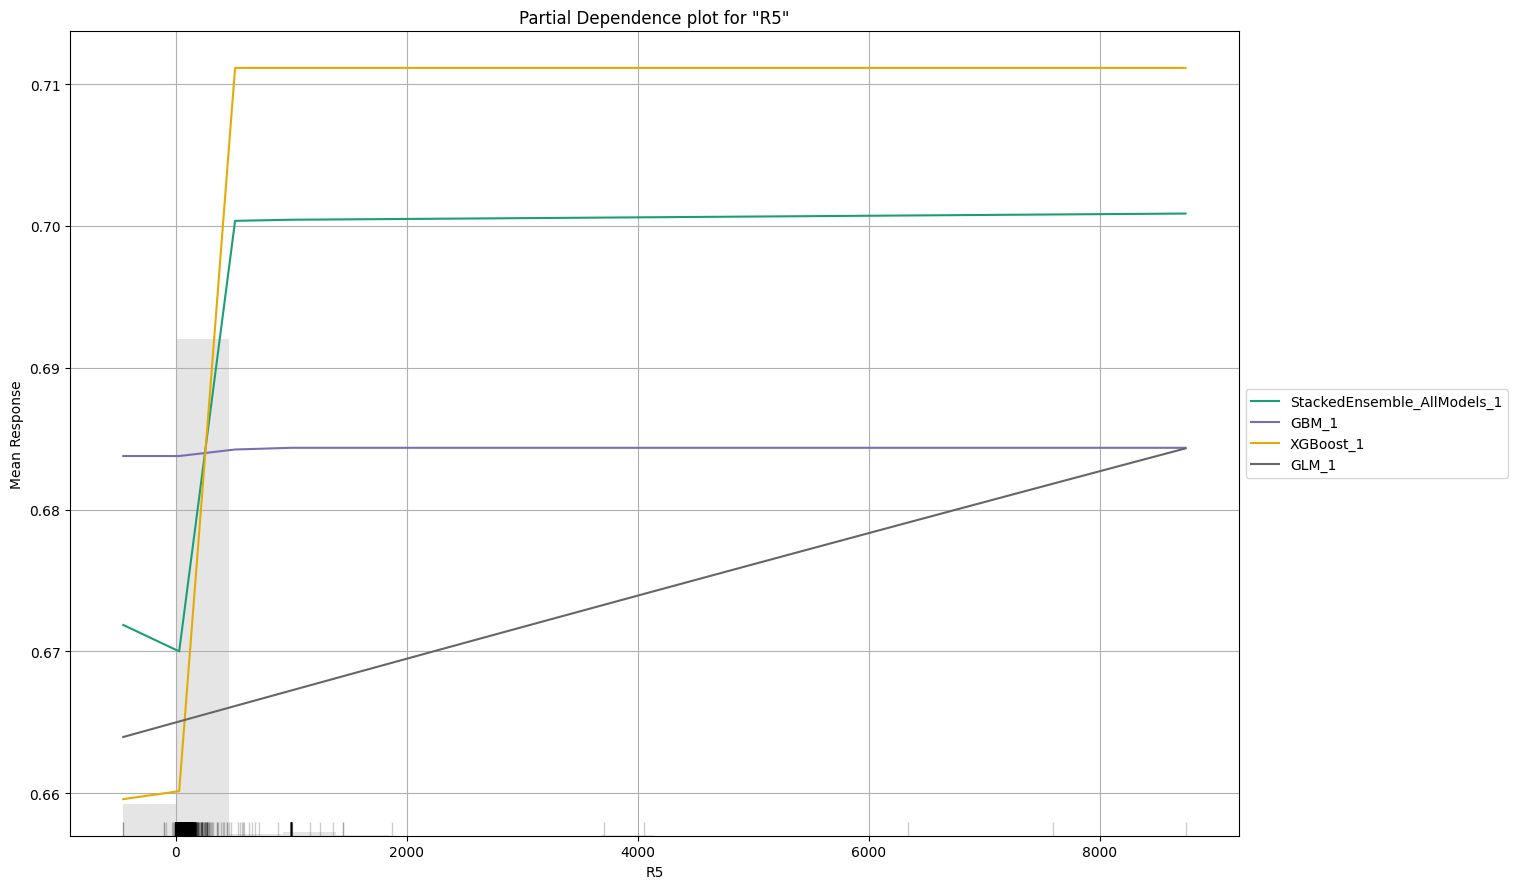

In [ ]:
# Explain leader model & compare with all AutoML models

# Leaderboard (compare all models)

# Confusion Matrix for Leader Model (classification only)

# Residual Analysis for Leader Model (regression only)

# Variable Importance of Top Base (non-Stacked) Model

# Variable Importance Heatmap (compare all non-Stacked models)

# Model Correlation Heatmap (compare all models)

# SHAP Summary of Top Tree-based Model (TreeSHAP)

# Partial Dependence (PD) Multi Plots (compare all models)

# Individual Conditional Expectation (ICE)

exm_2 = aml.explain(test_h2o)

In [ ]:
# You might also want to get parameters from the stacked ensemble and the metalearner:
metalearner_params = h2o.get_model(stack_id).metalearner().actual_params
se_params = h2o.get_model(stack_id).actual_params
#metalearner_params
se_params

{'model_id': 'StackedEnsemble_AllModels_1_AutoML_3_20240329_82101',
 'training_frame': 'AutoML_3_20240329_82101_training_py_9_sid_89d0',
 'response_column': 'Insolvent?',
 'validation_frame': None,
 'blending_frame': None,
 'base_models': [{'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'GBM_1_AutoML_3_20240329_82101',
   'type': 'Key<Keyed>',
   'URL': None},
  {'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'XGBoost_1_AutoML_3_20240329_82101',
   'type': 'Key<Keyed>',
   'URL': None},
  {'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'XGBoost_2_AutoML_3_20240329_82101',
   'type': 'Key<Keyed>',
   'URL': None},
  {'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'GLM_1_AutoML_3_20240329_82101',
   'type': 'Key<Keyed>',
   'URL': None}],
 'metalearner_algorit

In [ ]:
metalearner = h2o.get_model(stack_id).metalearner()
metalearner

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: metalearner_AUTO_StackedEnsemble_AllModels_1_AutoML_3_20240329_82101


GLM Model: summary
    family    link    regularization                                 lambda_search                                                                    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------------------------  -------------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ---------------------------------------------------------------------
    binomial  logit   Elastic Net (alpha = 0.5, lambda = 0.006995 )  nlambda = 100, lambda.max = 2.6954, lambda.min = 0.006995, lambda.1se = 0.04496  4                             4                              102                     levelone_training_StackedEnsemble_AllModels_1_AutoML_3_20240329_82101

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.0682998887760411
RMSE: 0.26134247411402745
LogLoss: 0.23132793953584635
AUC: 0.9622255319125318
AUCPR: 0.9795022025294201
Gini: 0.9244510638250636
Null degrees of freedom: 15363
Residual degrees of freedom: 15359
Null deviance: 19502.416390708786
Residual deviance: 7108.244926057487
AIC: 7118.244926057487

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5023982823883473
           Insolvent    Solvent    Error    Rate
---------  -----------  ---------  -------  ----------------
Insolvent  4353         728        0.1433   (728.0/5081.0)
Solvent    675          9608       0.0656   (675.0/10283.0)
Total      5028         10336      0.0913   (1403.0/15364.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.502398     0.931956  209
max f2                       0.193439     0.951387  301
max f0point5                 0.79734      0.943604  130
max accuracy                 0.525157     0.908683  203
max precision                0.996978     1         0
max recall                   0.00985939   1         398
max specificity              0.996978     1         0
max absolute_mcc             0.525157     0.793936  203
max min_per_class_accuracy   0.669028     0.901594  166
max mean_per_class_accuracy  0.74711      0.903031  145
max tns                      0.996978     5081      0
max fns                      0.996978     10208     0
max fps                      0.00781216   5081      399
max tps                      0.00985939   10283     398
max tnr                      0.996978     1         0
max fnr                      0.996978     0.992706  0
max fpr                      0.00781216   1         399
max tpr                      0.00985939   1         398

Gains/Lift Table: Avg response rate: 66.93 %, avg score: 66.93 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100234                   0.995963           1.49412    1.49412            1                0.99662    1                           0.99662             0.0149762       0.0149762                  49.4117   49.4117            0.0149762
2        0.0200469                   0.995353           1.48441    1.48927            0.993506         0.995641   0.996753                    0.99613             0.0148789       0.0298551                  48.4414   48.92

In [ ]:
metalearner._model_json['output']['coefficients_table']

names,coefficients,standardized_coefficients
Intercept,-0.0005459,1.5341713
GBM_1_AutoML_3_20240329_82101,0.4395812,1.3242589
XGBoost_1_AutoML_3_20240329_82101,0.2460262,0.8601027
XGBoost_2_AutoML_3_20240329_82101,0.2188174,0.7891557
GLM_1_AutoML_3_20240329_82101,0.0260507,0.0974737


In [ ]:
metalearner_params

{'model_id': 'metalearner_AUTO_StackedEnsemble_AllModels_1_AutoML_3_20240329_82101',
 'training_frame': 'levelone_training_StackedEnsemble_AllModels_1_AutoML_3_20240329_82101',
 'validation_frame': None,
 'nfolds': 5,
 'checkpoint': None,
 'export_checkpoints_dir': None,
 'seed': 6,
 'keep_cross_validation_models': False,
 'keep_cross_validation_predictions': False,
 'keep_cross_validation_fold_assignment': False,
 'fold_assignment': 'Random',
 'fold_column': None,
 'response_column': 'Insolvent?',
 'ignored_columns': None,
 'random_columns': None,
 'ignore_const_cols': True,
 'score_each_iteration': False,
 'score_iteration_interval': 5,
 'offset_column': None,
 'weights_column': None,
 'family': 'binomial',
 'rand_family': None,
 'tweedie_variance_power': 0.0,
 'tweedie_link_power': 1.0,
 'theta': 1e-10,
 'solver': 'COORDINATE_DESCENT',
 'alpha': [0.5],
 'lambda': [2.6953956846884295,
  2.4559441608825057,
  2.2377648504954464,
  2.0389679887157968,
  1.8578316922295413,
  1.69278704

### Try to access to the details of the best model.

In [ ]:
h2o.get_model(stack_id)

key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/4
# GBM base models (used / total),1/1
# XGBoost base models (used / total),2/2
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None
Custom metalearner hyperparameters,None


In [ ]:
## To get parameters from all the base models you can use the following:
{base_model: h2o.get_model(base_model).actual_params
 for base_model in h2o.get_model(stack_id).base_models}

{'GBM_1_AutoML_3_20240329_82101': {'model_id': 'GBM_1_AutoML_3_20240329_82101',
  'training_frame': 'AutoML_3_20240329_82101_training_py_9_sid_89d0',
  'validation_frame': None,
  'nfolds': 5,
  'keep_cross_validation_models': False,
  'keep_cross_validation_predictions': True,
  'keep_cross_validation_fold_assignment': False,
  'score_each_iteration': False,
  'score_tree_interval': 5,
  'fold_assignment': 'Modulo',
  'fold_column': None,
  'response_column': 'Insolvent?',
  'ignored_columns': [],
  'ignore_const_cols': True,
  'offset_column': None,
  'weights_column': None,
  'balance_classes': False,
  'class_sampling_factors': None,
  'max_after_balance_size': 5.0,
  'max_confusion_matrix_size': 20,
  'ntrees': 57,
  'max_depth': 15,
  'min_rows': 100.0,
  'nbins': 20,
  'nbins_top_level': 1024,
  'nbins_cats': 1024,
  'r2_stopping': 1.7976931348623157e+308,
  'stopping_rounds': 0,
  'stopping_metric': 'logloss',
  'stopping_tolerance': 0.008067664895780353,
  'max_runtime_secs': 

In [ ]:
# You might also want to get parameters from the stacked ensemble and the metalearner:
metalearner_params = h2o.get_model(stack_id).metalearner().actual_params
se_params = h2o.get_model(stack_id).actual_params
metalearner_params
se_params

{'model_id': 'StackedEnsemble_AllModels_1_AutoML_3_20240329_82101',
 'training_frame': 'AutoML_3_20240329_82101_training_py_9_sid_89d0',
 'response_column': 'Insolvent?',
 'validation_frame': None,
 'blending_frame': None,
 'base_models': [{'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'GBM_1_AutoML_3_20240329_82101',
   'type': 'Key<Keyed>',
   'URL': None},
  {'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'XGBoost_1_AutoML_3_20240329_82101',
   'type': 'Key<Keyed>',
   'URL': None},
  {'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'XGBoost_2_AutoML_3_20240329_82101',
   'type': 'Key<Keyed>',
   'URL': None},
  {'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'GLM_1_AutoML_3_20240329_82101',
   'type': 'Key<Keyed>',
   'URL': None}],
 'metalearner_algorit

In [ ]:
metalearner_params

{'model_id': 'metalearner_AUTO_StackedEnsemble_AllModels_1_AutoML_3_20240329_82101',
 'training_frame': 'levelone_training_StackedEnsemble_AllModels_1_AutoML_3_20240329_82101',
 'validation_frame': None,
 'nfolds': 5,
 'checkpoint': None,
 'export_checkpoints_dir': None,
 'seed': 6,
 'keep_cross_validation_models': False,
 'keep_cross_validation_predictions': False,
 'keep_cross_validation_fold_assignment': False,
 'fold_assignment': 'Random',
 'fold_column': None,
 'response_column': 'Insolvent?',
 'ignored_columns': None,
 'random_columns': None,
 'ignore_const_cols': True,
 'score_each_iteration': False,
 'score_iteration_interval': 5,
 'offset_column': None,
 'weights_column': None,
 'family': 'binomial',
 'rand_family': None,
 'tweedie_variance_power': 0.0,
 'tweedie_link_power': 1.0,
 'theta': 1e-10,
 'solver': 'COORDINATE_DESCENT',
 'alpha': [0.5],
 'lambda': [2.6953956846884295,
  2.4559441608825057,
  2.2377648504954464,
  2.0389679887157968,
  1.8578316922295413,
  1.69278704

In [ ]:
model_performance = h2o.get_model(stack_id).model_performance(test_h2o)
print(model_performance)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.06673302505992511
RMSE: 0.25832736026198444
LogLoss: 0.229592053419209
AUC: 0.9622175023552618
AUCPR: 0.979359657473852
Gini: 0.9244350047105236
Null degrees of freedom: 3841
Residual degrees of freedom: 3837
Null deviance: 4880.284579549953
Residual deviance: 1764.1853384732021
AIC: 1774.1853384732021

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.519226877463224
           Insolvent    Solvent    Error    Rate
---------  -----------  ---------  -------  --------------
Insolvent  1125         148        0.1163   (148.0/1273.0)
Solvent    184          2385       0.0716   (184.0/2569.0)
Total      1309         2533       0.0864   (332.0/3842.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.519227     0.934927  202
max f2                    

In [ ]:
# Cross-Validation Results
cv_results = h2o.get_model(stack_id).cross_validation_metrics_summary()
print(cv_results)

Cross-Validation Metrics Summary: 
                      mean         sd             cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
--------------------  -----------  -------------  ------------  ------------  ------------  ------------  ------------
accuracy              0.91002244   0.0028734345   0.9072398     0.9098894     0.90752554    0.9112484     0.9142091
aic                   1433.2745    44.616356      1446.2017     1473.207      1460.3588     1427.0049     1359.6002
auc                   0.9623132    0.0020280962   0.9625459     0.95913833    0.96245056    0.96262777    0.96480334
err                   0.089977555  0.0028734345   0.09276018    0.09011061    0.09247449    0.08875163    0.08579089
err_count             276.6        13.464768      287.0         277.0         290.0         273.0         256.0
f0point5              0.93248445   0.004933644    0.925961      0.9292554     0.93308836    0.9380998     0.93601775
f1                    0.9328165   